# Case Study: Consumer Finance Loan Risk Analysis

## Problem Statement
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment.

## Objective
To identify risky loan applicants using EDA, so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

## Target Variable
The column `loan_status` is our target variable. We are interested in distinguishing between 'Fully Paid' and 'Charged Off' (Defaulted).

The data given below contains information about past loan applicants and whether they ‘defaulted’. The aim is to identify patterns indicating that a person is likely to default, which may be used to deny the loan, reduce the loan amount, lend (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of defaulting.

The following image depicts the decisions that could be undertaken by the firm.

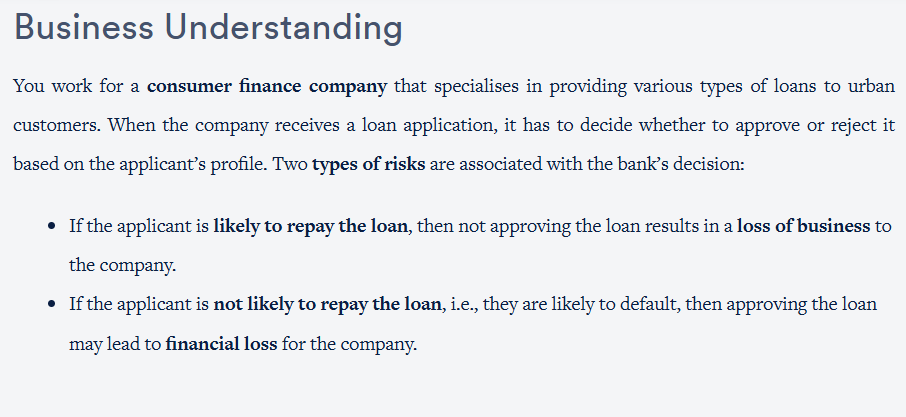

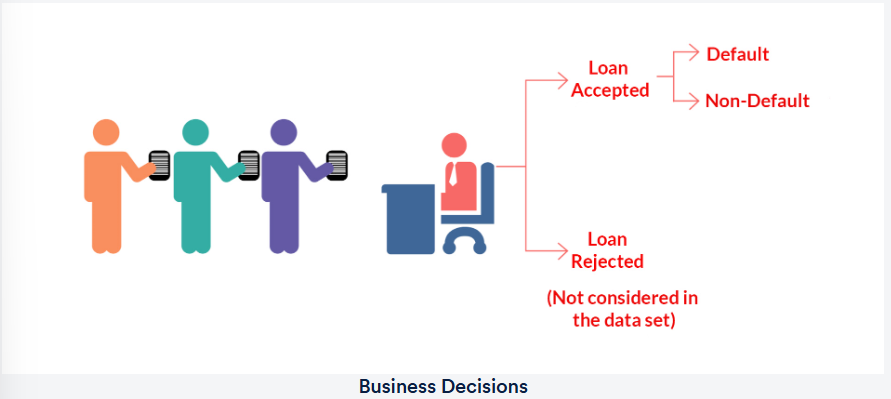

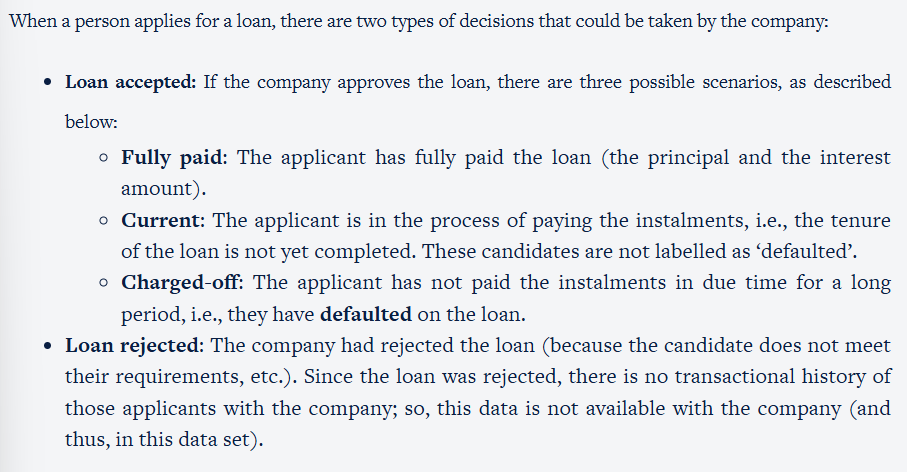

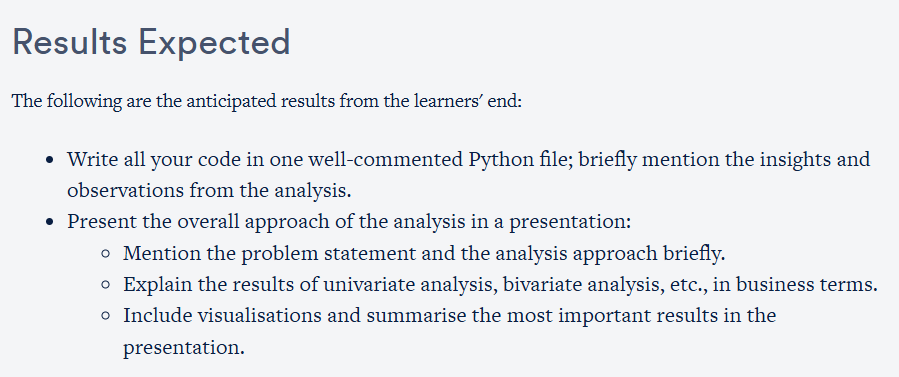

In [2]:
'''
□ PHASE 1: FIRST LOOK
  □ Load data
  □ Check shape, head, tail
  □ Check info() and describe()

□ PHASE 2: DATA QUALITY
  □ Check missing values
  □ Check duplicates
  □ Fix data types
  □ Remove useless columns

□ PHASE 3: UNIVARIATE
  □ Analyze target variable first
  □ Histograms for numerical
  □ Bar charts for categorical
  □ Note any skewness/outliers

□ PHASE 4: BIVARIATE
  □ Target vs key numerical columns
  □ Target vs key categorical columns
  □ Correlation heatmap
  □ Note strong relationships

□ PHASE 5: MULTIVARIATE (if needed)
  □ Pair plots
  □ Grouped analysis

□ PHASE 6: OUTLIERS
  □ Identify outliers
  □ Decide: remove/cap/keep

□ PHASE 7: DOCUMENT
  □ Write insights
  □ Create visualizations for presentation
  □ Business recommendations

  '''

'\n□ PHASE 1: FIRST LOOK\n  □ Load data\n  □ Check shape, head, tail\n  □ Check info() and describe()\n\n□ PHASE 2: DATA QUALITY\n  □ Check missing values\n  □ Check duplicates\n  □ Fix data types\n  □ Remove useless columns\n\n□ PHASE 3: UNIVARIATE\n  □ Analyze target variable first\n  □ Histograms for numerical\n  □ Bar charts for categorical\n  □ Note any skewness/outliers\n\n□ PHASE 4: BIVARIATE\n  □ Target vs key numerical columns\n  □ Target vs key categorical columns\n  □ Correlation heatmap\n  □ Note strong relationships\n\n□ PHASE 5: MULTIVARIATE (if needed)\n  □ Pair plots\n  □ Grouped analysis\n\n□ PHASE 6: OUTLIERS\n  □ Identify outliers\n  □ Decide: remove/cap/keep\n\n□ PHASE 7: DOCUMENT\n  □ Write insights\n  □ Create visualizations for presentation\n  □ Business recommendations\n\n  '

## 1. Setup & Data Loading

We begin by importing the necessary libraries and loading the loan dataset. 
The dataset contains ~39,000+ loan records with 111 columns covering borrower demographics, 
loan details, and repayment outcomes.

**Libraries used:**
- `pandas` - for data manipulation and analysis
- `numpy` - for numerical operations
- `matplotlib` & `seaborn` - for data visualization


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
dset=pd.read_csv("D:\\OnlyFor ML and DS\\DATASETS\\loan.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_8152\2990394749.py:1: DtypeWarning: Columns (0: next_pymnt_d) have mixed types. Specify dtype option on import or set low_memory=False.
  dset=pd.read_csv("D:\\OnlyFor ML and DS\\DATASETS\\loan.csv")


In [5]:
# Display the first 5 rows of the dataset to understand its structure
dset.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [6]:
# Create a backup copy of the original dataset before any modifications
dset_back_up=dset.copy()

## 2. Data Understanding

Before diving into analysis, it is essential to understand what each column represents. 
The dataset contains information about loan applicants including:
- **Borrower profile**: employment, income, home ownership
- **Loan details**: amount, term, interest rate, grade
- **Credit history**: delinquencies, public records, revolving balance
- **Outcome**: loan status (Fully Paid / Charged Off / Current)


In [7]:
# =========================
# LoanStatNew – Column Descriptions
# =========================

# acc_now_delinq: The number of accounts on which the borrower is now delinquent.
# acc_open_past_24mths: Number of trades opened in past 24 months.
# addr_state: The state provided by the borrower in the loan application.
# all_util: Balance to credit limit on all trades.
# annual_inc: Self-reported annual income provided by the borrower during registration.
# annual_inc_joint: Combined self-reported annual income provided by co-borrowers.
# application_type: Indicates individual or joint loan application.
# avg_cur_bal: Average current balance of all accounts.
# bc_open_to_buy: Total open to buy on revolving bankcards.
# bc_util: Ratio of total current balance to high credit limit for all bankcard accounts.
# chargeoff_within_12_mths: Number of charge-offs within 12 months.
# collection_recovery_fee: Post charge-off collection fee.
# collections_12_mths_ex_med: Number of collections in 12 months excluding medical.
# delinq_2yrs: Number of 30+ days past-due delinquencies in past 2 years.
# delinq_amnt: Past-due amount owed for delinquent accounts.
# desc: Loan description provided by the borrower.
# dti: Debt-to-income ratio excluding mortgage and requested loan.
# dti_joint: Joint debt-to-income ratio for co-borrowers.
# earliest_cr_line: Month the earliest credit line was opened.
# emp_length: Employment length in years (0–10).
# emp_title: Job title provided by the borrower.
# fico_range_high: Upper boundary of borrower’s FICO score range at origination.
# fico_range_low: Lower boundary of borrower’s FICO score range at origination.
# funded_amnt: Total amount committed to the loan.
# funded_amnt_inv: Total amount committed by investors.
# grade: Loan grade assigned by LC.
# home_ownership: Home ownership status (RENT, OWN, MORTGAGE, OTHER).
# id: Unique loan ID assigned by LC.
# il_util: Ratio of installment balance to high credit limit.
# initial_list_status: Initial listing status (W or F).
# inq_fi: Number of personal finance inquiries.
# inq_last_12m: Number of credit inquiries in past 12 months.
# inq_last_6mths: Number of inquiries in past 6 months (excluding auto/mortgage).
# installment: Monthly payment owed by the borrower.
# int_rate: Interest rate on the loan.
# issue_d: Month the loan was funded.
# last_credit_pull_d: Most recent month credit was pulled.
# last_fico_range_high: Upper boundary of last FICO score range.
# last_fico_range_low: Lower boundary of last FICO score range.
# last_pymnt_amnt: Last total payment amount received.
# last_pymnt_d: Month the last payment was received.
# loan_amnt: Loan amount applied for by the borrower.
# loan_status: Current status of the loan.
# max_bal_bc: Maximum current balance on revolving accounts.
# member_id: Unique borrower member ID.
# mo_sin_old_il_acct: Months since oldest installment account opened.
# mo_sin_old_rev_tl_op: Months since oldest revolving account opened.
# mo_sin_rcnt_rev_tl_op: Months since most recent revolving account opened.
# mo_sin_rcnt_tl: Months since most recent account opened.
# mort_acc: Number of mortgage accounts.
# mths_since_last_delinq: Months since last delinquency.
# mths_since_last_major_derog: Months since last major derogatory event.
# mths_since_last_record: Months since last public record.
# mths_since_rcnt_il: Months since most recent installment account opened.
# mths_since_recent_bc: Months since most recent bankcard opened.
# mths_since_recent_bc_dlq: Months since most recent bankcard delinquency.
# mths_since_recent_inq: Months since most recent inquiry.
# mths_since_recent_revol_delinq: Months since most recent revolving delinquency.
# next_pymnt_d: Next scheduled payment date.
# num_accts_ever_120_pd: Number of accounts ever 120+ days past due.
# num_actv_bc_tl: Number of active bankcard accounts.
# num_actv_rev_tl: Number of active revolving accounts.
# num_bc_sats: Number of satisfactory bankcard accounts.
# num_bc_tl: Number of bankcard accounts.
# num_il_tl: Number of installment accounts.
# num_op_rev_tl: Number of open revolving accounts.
# num_rev_accts: Number of revolving accounts.
# num_rev_tl_bal_gt_0: Number of revolving accounts with balance > 0.
# num_sats: Number of satisfactory accounts.
# num_tl_120dpd_2m: Number of accounts 120 days past due (last 2 months).
# num_tl_30dpd: Number of accounts 30 days past due (last 2 months).
# num_tl_90g_dpd_24m: Number of accounts 90+ days past due in last 24 months.
# num_tl_op_past_12m: Number of accounts opened in past 12 months.
# open_acc: Number of open credit lines.
# open_acc_6m: Number of open trades in last 6 months.
# open_il_12m: Installment accounts opened in past 12 months.
# open_il_24m: Installment accounts opened in past 24 months.
# open_il_6m: Active installment trades.
# open_rv_12m: Revolving accounts opened in past 12 months.
# open_rv_24m: Revolving accounts opened in past 24 months.
# out_prncp: Remaining outstanding principal.
# out_prncp_inv: Remaining outstanding principal owed to investors.
# pct_tl_nvr_dlq: Percentage of trades never delinquent.
# percent_bc_gt_75: Percentage of bankcards with utilization > 75%.
# policy_code: Policy code (1 = public, 2 = non-public).
# pub_rec: Number of derogatory public records.
# pub_rec_bankruptcies: Number of public record bankruptcies.
# purpose: Loan purpose category.
# pymnt_plan: Indicates if a payment plan is in place.
# recoveries: Post charge-off gross recovery.
# revol_bal: Total revolving credit balance.
# revol_util: Revolving credit utilization rate.
# sub_grade: Loan sub-grade assigned by LC.
# tax_liens: Number of tax liens.
# term: Loan term in months (36 or 60).
# title: Loan title provided by the borrower.
# tot_coll_amt: Total collection amounts ever owed.
# tot_cur_bal: Total current balance of all accounts.
# tot_hi_cred_lim: Total high credit/credit limit.
# total_acc: Total number of credit lines.
# total_bal_ex_mort: Total credit balance excluding mortgage.
# total_bal_il: Total balance of installment accounts.
# total_bc_limit: Total bankcard credit limit.
# total_cu_tl: Number of finance trades.
# total_il_high_credit_limit: Total installment high credit limit.
# total_pymnt: Total payments received.
# total_pymnt_inv: Total payments received by investors.
# total_rec_int: Total interest received.
# total_rec_late_fee: Total late fees received.
# total_rec_prncp: Total principal received.
# total_rev_hi_lim: Total revolving high credit limit.
# url: URL to the loan listing page.
# verification_status: Income verification status.
# verified_status_joint: Joint income verification status.
# zip_code: First 3 digits of borrower’s zip code.

# =========================
# RejectStats – Column Descriptions
# =========================

# amount_requested: Total amount requested by the borrower.
# application_date: Date on which the borrower applied for the loan.
# loan_title: Loan title provided by the borrower.
# risk_score: Credit risk score of the borrower.
#   - Before Nov 5, 2013: FICO score
#   - After Nov 5, 2013: Vantage score
# debt_to_income_ratio: Debt-to-income ratio calculated as total monthly debt
#   payments (excluding mortgage and requested loan) divided by
#   self-reported monthly income.
# zip_code: First 3 digits of the borrower’s zip code.
# state: State provided by the borrower in the loan application.
# employment_length: Employment length in years (0–10),
#   where 0 = less than 1 year and 10 = 10 or more years.
# policy_code: Policy code indicator
#   - 1: Publicly available products
#   - 2: New products not publicly available

In [8]:
# NOTE: Why we use dset.info(verbose=True) instead of dset.info()
# -------------------------------------------------------------------
# By default, pandas truncates the info() output when a DataFrame has 
# more than 100 columns (controlled by pd.options.display.max_info_columns).
# 
# Since our dataset has 111 columns, calling dset.info() only shows:
# "Columns: 111 entries, id to total_il_high_credit_limit"
# without listing each column's name, non-null count, and dtype.
#
# Using verbose=True forces pandas to display the full details of 
# ALL columns regardless of how many there are.
# -------------------------------------------------------------------
dset.info(verbose=True, show_counts=True)

<class 'pandas.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  str    
 6    int_rate                        39717 non-null  str    
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  str    
 9    sub_grade                       39717 non-null  str    
 10   emp_title                       37258 non-null  str    
 11   emp_length                      38642 non-null  str    
 12   home_ownership             

In [9]:
#Alternatively, you can temporarily change the pandas display option:
pd.set_option('display.max_info_columns', 200)  # Set higher than your column count
dset.info()

<class 'pandas.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  str    
 6    int_rate                        39717 non-null  str    
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  str    
 9    sub_grade                       39717 non-null  str    
 10   emp_title                       37258 non-null  str    
 11   emp_length                      38642 non-null  str    
 12   home_ownership             

In [10]:
# This creates a scrollable DataFrame with ALL column info - no truncation possible!

col_info = pd.DataFrame({
    'Column': dset.columns,
    'Non-Null Count': dset.notnull().sum().values,
    'Null Count': dset.isnull().sum().values,
    'Dtype': dset.dtypes.values
})

# Force display ALL rows
pd.set_option('display.max_rows', None)
display(col_info)

Column  Non-Null Count  Null Count    Dtype
0                                id           39717           0    int64
1                         member_id           39717           0    int64
2                         loan_amnt           39717           0    int64
3                       funded_amnt           39717           0    int64
4                   funded_amnt_inv           39717           0  float64
5                              term           39717           0      str
6                          int_rate           39717           0      str
7                       installment           39717           0  float64
8                             grade           39717           0      str
9                         sub_grade           39717           0      str
10                        emp_title           37258        2459      str
11                       emp_length           38642        1075      str
12                   home_ownership           39717           0      str
13                       annual_inc           39717           0  float64
14              verification_status           39717           0      str
15                          issue_d           39717           0      str
16                      loan_status           39717           0      str
17                       pymnt_plan           39717           0      str
18                              url           39717           0      str
19                             desc           26775       12942      str
20                          purpose           39717           0      str
21                            title           39706          11      str
22                         zip_code           39717           0      str
23                       addr_state           39717           0      str
24                              dti           39717           0  float64
25                      delinq_2yrs           39717           0    int64
26                 earliest_cr_line           39717           0      str
27                   inq_last_6mths           39717           0    int64
28           mths_since_last_delinq           14035       25682  float64
29           mths_since_last_record            2786       36931  float64
30                         open_acc           39717           0    int64
31                          pub_rec           39717           0    int64
32                        revol_bal           39717           0    int64
33                       revol_util           39667          50      str
34                        total_acc           39717           0    int64
35              initial_list_status           39717           0      str
36                        out_prncp           39717           0  float64
37                    out_prncp_inv           39717           0  float64
38                      total_pymnt           39717           0  float64
39                  total_pymnt_inv           39717           0  float64
40                  total_rec_prncp           39717           0  float64
41                    total_rec_int           39717           0  float64
42               total_rec_late_fee           39717           0  float64
43                       recoveries           39717           0  float64
44          collection_recovery_fee           39717           0  float64
45                     last_pymnt_d           39646          71      str
46                  last_pymnt_amnt           39717           0  float64
47                     next_pymnt_d            1140       38577      str
48               last_credit_pull_d           39715           2      str
49       collections_12_mths_ex_med           39661          56  float64
50      mths_since_last_major_derog               0       39717  float64
51                      policy_code           39717           0    int64
52                 application_type           39717           0      str
53                 annual_inc_joint               0       39717  float64
54            

In [11]:
# =========================
# LoanStatNew – Column Descriptions
# =========================

# acc_now_delinq: The number of accounts on which the borrower is now delinquent.
# acc_open_past_24mths: Number of trades opened in past 24 months.
# addr_state: The state provided by the borrower in the loan application.
# all_util: Balance to credit limit on all trades.
# annual_inc: Self-reported annual income provided by the borrower during registration.
# annual_inc_joint: Combined self-reported annual income provided by co-borrowers.
# application_type: Indicates individual or joint loan application.
# avg_cur_bal: Average current balance of all accounts.
# bc_open_to_buy: Total open to buy on revolving bankcards.
# bc_util: Ratio of total current balance to high credit limit for all bankcard accounts.
# chargeoff_within_12_mths: Number of charge-offs within 12 months.
# collection_recovery_fee: Post charge-off collection fee.
# collections_12_mths_ex_med: Number of collections in 12 months excluding medical.
# delinq_2yrs: Number of 30+ days past-due delinquencies in past 2 years.
# delinq_amnt: Past-due amount owed for delinquent accounts.
# desc: Loan description provided by the borrower.
# dti: Debt-to-income ratio excluding mortgage and requested loan.
# dti_joint: Joint debt-to-income ratio for co-borrowers.
# earliest_cr_line: Month the earliest credit line was opened.
# emp_length: Employment length in years (0–10).
# emp_title: Job title provided by the borrower.
# fico_range_high: Upper boundary of borrower’s FICO score range at origination.
# fico_range_low: Lower boundary of borrower’s FICO score range at origination.
# funded_amnt: Total amount committed to the loan.
# funded_amnt_inv: Total amount committed by investors.
# grade: Loan grade assigned by LC.
# home_ownership: Home ownership status (RENT, OWN, MORTGAGE, OTHER).
# id: Unique loan ID assigned by LC.
# il_util: Ratio of installment balance to high credit limit.
# initial_list_status: Initial listing status (W or F).
# inq_fi: Number of personal finance inquiries.
# inq_last_12m: Number of credit inquiries in past 12 months.
# inq_last_6mths: Number of inquiries in past 6 months (excluding auto/mortgage).
# installment: Monthly payment owed by the borrower.
# int_rate: Interest rate on the loan.
# issue_d: Month the loan was funded.
# last_credit_pull_d: Most recent month credit was pulled.
# last_fico_range_high: Upper boundary of last FICO score range.
# last_fico_range_low: Lower boundary of last FICO score range.
# last_pymnt_amnt: Last total payment amount received.
# last_pymnt_d: Month the last payment was received.
# loan_amnt: Loan amount applied for by the borrower.
# loan_status: Current status of the loan.
# max_bal_bc: Maximum current balance on revolving accounts.
# member_id: Unique borrower member ID.
# mo_sin_old_il_acct: Months since oldest installment account opened.
# mo_sin_old_rev_tl_op: Months since oldest revolving account opened.
# mo_sin_rcnt_rev_tl_op: Months since most recent revolving account opened.
# mo_sin_rcnt_tl: Months since most recent account opened.
# mort_acc: Number of mortgage accounts.
# mths_since_last_delinq: Months since last delinquency.
# mths_since_last_major_derog: Months since last major derogatory event.
# mths_since_last_record: Months since last public record.
# mths_since_rcnt_il: Months since most recent installment account opened.
# mths_since_recent_bc: Months since most recent bankcard opened.
# mths_since_recent_bc_dlq: Months since most recent bankcard delinquency.
# mths_since_recent_inq: Months since most recent inquiry.
# mths_since_recent_revol_delinq: Months since most recent revolving delinquency.
# next_pymnt_d: Next scheduled payment date.
# num_accts_ever_120_pd: Number of accounts ever 120+ days past due.
# num_actv_bc_tl: Number of active bankcard accounts.
# num_actv_rev_tl: Number of active revolving accounts.
# num_bc_sats: Number of satisfactory bankcard accounts.
# num_bc_tl: Number of bankcard accounts.
# num_il_tl: Number of installment accounts.
# num_op_rev_tl: Number of open revolving accounts.
# num_rev_accts: Number of revolving accounts.
# num_rev_tl_bal_gt_0: Number of revolving accounts with balance > 0.
# num_sats: Number of satisfactory accounts.
# num_tl_120dpd_2m: Number of accounts 120 days past due (last 2 months).
# num_tl_30dpd: Number of accounts 30 days past due (last 2 months).
# num_tl_90g_dpd_24m: Number of accounts 90+ days past due in last 24 months.
# num_tl_op_past_12m: Number of accounts opened in past 12 months.
# open_acc: Number of open credit lines.
# open_acc_6m: Number of open trades in last 6 months.
# open_il_12m: Installment accounts opened in past 12 months.
# open_il_24m: Installment accounts opened in past 24 months.
# open_il_6m: Active installment trades.
# open_rv_12m: Revolving accounts opened in past 12 months.
# open_rv_24m: Revolving accounts opened in past 24 months.
# out_prncp: Remaining outstanding principal.
# out_prncp_inv: Remaining outstanding principal owed to investors.
# pct_tl_nvr_dlq: Percentage of trades never delinquent.
# percent_bc_gt_75: Percentage of bankcards with utilization > 75%.
# policy_code: Policy code (1 = public, 2 = non-public).
# pub_rec: Number of derogatory public records.
# pub_rec_bankruptcies: Number of public record bankruptcies.
# purpose: Loan purpose category.
# pymnt_plan: Indicates if a payment plan is in place.
# recoveries: Post charge-off gross recovery.
# revol_bal: Total revolving credit balance.
# revol_util: Revolving credit utilization rate.
# sub_grade: Loan sub-grade assigned by LC.
# tax_liens: Number of tax liens.
# term: Loan term in months (36 or 60).
# title: Loan title provided by the borrower.
# tot_coll_amt: Total collection amounts ever owed.
# tot_cur_bal: Total current balance of all accounts.
# tot_hi_cred_lim: Total high credit/credit limit.
# total_acc: Total number of credit lines.
# total_bal_ex_mort: Total credit balance excluding mortgage.
# total_bal_il: Total balance of installment accounts.
# total_bc_limit: Total bankcard credit limit.
# total_cu_tl: Number of finance trades.
# total_il_high_credit_limit: Total installment high credit limit.
# total_pymnt: Total payments received.
# total_pymnt_inv: Total payments received by investors.
# total_rec_int: Total interest received.
# total_rec_late_fee: Total late fees received.
# total_rec_prncp: Total principal received.
# total_rev_hi_lim: Total revolving high credit limit.
# url: URL to the loan listing page.
# verification_status: Income verification status.
# verified_status_joint: Joint income verification status.
# zip_code: First 3 digits of borrower’s zip code.

# =========================
# RejectStats – Column Descriptions
# =========================

# amount_requested: Total amount requested by the borrower.
# application_date: Date on which the borrower applied for the loan.
# loan_title: Loan title provided by the borrower.
# risk_score: Credit risk score of the borrower.
#   - Before Nov 5, 2013: FICO score
#   - After Nov 5, 2013: Vantage score
# debt_to_income_ratio: Debt-to-income ratio calculated as total monthly debt
#   payments (excluding mortgage and requested loan) divided by
#   self-reported monthly income.
# zip_code: First 3 digits of the borrower’s zip code.
# state: State provided by the borrower in the loan application.
# employment_length: Employment length in years (0–10),
#   where 0 = less than 1 year and 10 = 10 or more years.
# policy_code: Policy code indicator
#   - 1: Publicly available products
#   - 2: New products not publicly available

In [12]:
dset.shape

(39717, 111)

## 3. Data Cleaning

Data cleaning is a critical step before any analysis. Our strategy:
1. **Remove entirely null columns** - columns where ALL values are missing provide no information
2. **Handle partially null columns** - decide whether to impute, drop, or keep based on % missing
3. **Remove redundant/irrelevant columns** - columns not useful for default prediction
4. **Verify the cleaned dataset** - confirm shape and remaining null percentages


In [13]:
#First we need to find all the columns where all the values are null
dset.columns[dset.isnull().all()]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [14]:
null_columns=dset.columns[dset.isnull().all()]

In [15]:
dset = dset.drop(columns=null_columns)

In [16]:
dset.shape

(39717, 57)

In [17]:
#54 columns were removed from the data set as the column was completely filled with null values

In [18]:
# Display the first 5 rows of the dataset to understand its structure
dset.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0            1       INDIVIDUAL              0   
1                        0.0            1       INDIVIDUAL              0   
2                        0.0            1       INDIVIDUAL              0   
3                        0.0            1       INDIVIDUAL              0   
4                        0.0            1       INDIVIDUAL              0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0           0                  0.0       0.0  
1                      0.0           0                  0.0       0.0  
2                      0.0           0                  0.0       0.0  
3                      0.0           0                  0.0       0.0  
4                      0.0           0                  0.0       0.0  

[5 rows x 57 columns]

In [19]:
#lets drop "mths_since_last_delinq"column beacuse it has only 14035 non null valuesand 25682 null values
dset.drop(columns=["mths_since_last_delinq"], inplace=True)	

In [20]:
dset.shape

(39717, 56)

In [21]:
# Display the first 5 rows of the dataset to understand its structure
dset.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0            1       INDIVIDUAL              0   
1                        0.0            1       INDIVIDUAL              0   
2                        0.0            1       INDIVIDUAL              0   
3                        0.0            1       INDIVIDUAL              0   
4                        0.0            1       INDIVIDUAL              0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0           0                  0.0       0.0  
1                      0.0           0                  0.0       0.0  
2                      0.0           0                  0.0       0.0  
3                      0.0           0                  0.0       0.0  
4                      0.0           0                  0.0       0.0  

[5 rows x 56 columns]

In [22]:
#lets check the rows which have null values
dset.isnull().mean()*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [23]:
dset.shape

(39717, 56)

In [24]:
# ============================================================================
# STEP 1: IDENTIFY SINGLE VALUE COLUMNS
# ============================================================================
# WHY: Columns with only 1 unique value have ZERO variance
# IMPACT: Cannot contribute to any analysis or model - completely useless
# HOW TO FIND: Check nunique() == 1

single_val = dset.columns[dset.nunique() == 1].tolist()
print("Single Value Columns:", single_val)
# OUTPUT: ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 
#          'policy_code', 'application_type', 'acc_now_delinq', 
#          'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']

Single Value Columns: ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [25]:
# ============================================================================
# STEP 2: IDENTIFY IDENTIFIER/URL COLUMNS  
# ============================================================================
# WHY: These are unique IDs or URLs - not meaningful for analysis
# IMPACT: id/member_id = just row identifiers, url = web links, emp_title = too granular (28K unique)
# HOW TO FIND: Manual inspection - columns that are identifiers by nature

identifier_cols = ['id', 'member_id', 'url', 'emp_title']
print("Identifier Columns:", identifier_cols)

Identifier Columns: ['id', 'member_id', 'url', 'emp_title']


In [26]:
# ============================================================================
# STEP 3: IDENTIFY HIGH NULL COLUMNS (>90%)
# ============================================================================
# WHY: Columns with >90% missing data are unreliable for analysis
# IMPACT: Too many nulls = cannot draw meaningful conclusions
# HOW TO FIND: Check null percentage > 90%

null_pct = (dset.isnull().sum() / len(dset) * 100).round(2)
high_null = null_pct[null_pct > 90].index.tolist()
print("High Null Columns (>90%):", high_null)
# OUTPUT: ['next_pymnt_d', 'mths_since_last_record']

High Null Columns (>90%): ['mths_since_last_record', 'next_pymnt_d']


In [27]:
# ============================================================================
# STEP 4: IDENTIFY REDUNDANT/UNSTRUCTURED COLUMNS
# ============================================================================
# WHY: 'desc' = free text (hard to analyze), 'title' = redundant with 'purpose'
# IMPACT: Text columns need NLP, 'title' duplicates 'purpose' info
# HOW TO FIND: Manual inspection based on data dictionary

redundant_cols = ['desc', 'title']
print("Redundant/Unstructured Columns:", redundant_cols)

Redundant/Unstructured Columns: ['desc', 'title']


In [28]:
# ============================================================================
# STEP 5: COMBINE ALL COLUMNS TO DROP
# ============================================================================

cols_to_drop = single_val + identifier_cols + high_null + redundant_cols
print(f"Total columns to drop: {len(cols_to_drop)}")
print("Columns:", cols_to_drop)

Total columns to drop: 17
Columns: ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'id', 'member_id', 'url', 'emp_title', 'mths_since_last_record', 'next_pymnt_d', 'desc', 'title']


In [29]:
# ============================================================================
# STEP 6: DROP ALL USELESS COLUMNS
# ============================================================================

dset.drop(columns=cols_to_drop, inplace=True)
print(f"✅ Dropped {len(cols_to_drop)} columns")
print(f"📊 Remaining columns: {dset.shape[1]}")
print(f"📊 Remaining rows: {dset.shape[0]}")

✅ Dropped 17 columns
📊 Remaining columns: 39
📊 Remaining rows: 39717


In [30]:
# ===========================================================================
# STEP 7: DROP ADDITIONAL LOW-VALUE COLUMNS FOR LOAN DEFAULT ANALYSIS
# ===========================================================================

# Define columns to drop with reasons
additional_drops = {
    
    # ---- LOCATION COLUMNS (Too granular / not useful) ----
    'zip_code': 'Too many unique values (700+), hard to analyze, partial data masked',
    'addr_state': 'Geographic location rarely predicts default directly',
    
    # ---- DATE COLUMNS (Not predictive of default) ----
    'issue_d': 'Loan issue date - just a timestamp, not a predictor',
    'last_credit_pull_d': 'Operational date - when credit was checked, not predictive',
    'earliest_cr_line': 'Can derive credit history length instead, raw date not useful',
    
    # ---- NEAR-CONSTANT / LOW VARIANCE COLUMNS ----
    'acc_now_delinq': 'Almost always 0 - very low variance, not useful',
    'delinq_amnt': 'Almost always 0 - very low variance, not useful',
    'chargeoff_within_12_mths': 'Almost always 0 - very low variance',
    'collections_12_mths_ex_med': 'Almost always 0 - very low variance',
    'tax_liens': 'Almost always 0 - very low variance',
    
    # ---- REDUNDANT COLUMNS ----
    'sub_grade': 'Redundant - grade already captures risk level (sub_grade is too granular)',
    
}

# Print reasons before dropping
print("=" * 70)
print("📋 COLUMNS TO DROP WITH REASONS:")
print("=" * 70)
for col, reason in additional_drops.items():
    if col in dset.columns:
        print(f"❌ {col}")
        print(f"   Reason: {reason}")
        print()

# Get columns that actually exist in dataset
cols_to_drop = [col for col in additional_drops.keys() if col in dset.columns]

# Drop the columns
dset.drop(columns=cols_to_drop, inplace=True)

print("=" * 70)
print(f"✅ Dropped {len(cols_to_drop)} columns")
print(f"📊 Remaining columns: {dset.shape[1]}")
print(f"📊 Remaining rows: {dset.shape[0]}")
print("=" * 70)

# Show remaining columns
print("\n📋 REMAINING COLUMNS:")
print(dset.columns.tolist())

📋 COLUMNS TO DROP WITH REASONS:
❌ zip_code
   Reason: Too many unique values (700+), hard to analyze, partial data masked

❌ addr_state
   Reason: Geographic location rarely predicts default directly

❌ issue_d
   Reason: Loan issue date - just a timestamp, not a predictor

❌ last_credit_pull_d
   Reason: Operational date - when credit was checked, not predictive

❌ earliest_cr_line
   Reason: Can derive credit history length instead, raw date not useful

❌ sub_grade
   Reason: Redundant - grade already captures risk level (sub_grade is too granular)

✅ Dropped 6 columns
📊 Remaining columns: 33
📊 Remaining rows: 39717

📋 REMAINING COLUMNS:
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv'

In [31]:
# ===========================================================================
# STEP 8: DROP DATA LEAKAGE COLUMNS
# ===========================================================================
# These columns show performance of THIS specific loan (the one we're analyzing)
# We CANNOT use them to predict if THIS loan will default!

data_leakage_columns = {
    # --- FUNDING COLUMNS (Known after approval, slightly redundant) ---
    'funded_amnt': 'How much was actually funded for THIS loan - redundant with loan_amnt',
    'funded_amnt_inv': 'Amount funded by investors for THIS loan - redundant',
    
    # --- OUTSTANDING BALANCE (Known only after loan disbursement) ---
    'out_prncp': 'Outstanding principal on THIS loan - known only after loan is given',
    'out_prncp_inv': 'Outstanding principal (investor portion) on THIS loan',
    
    # --- PAYMENT INFORMATION (Known only after payments start) ---
    'total_pymnt': 'Total payment received on THIS loan - known only after payments',
    'total_pymnt_inv': 'Total payment from investors on THIS loan',
    'total_rec_prncp': 'Principal received on THIS loan - post-loan data',
    'total_rec_int': 'Interest received on THIS loan - post-loan data',
    'total_rec_late_fee': 'Late fees received on THIS loan - post-loan data',
    'last_pymnt_d': 'Last payment date on THIS loan - post-loan data',
    'last_pymnt_amnt': 'Last payment amount on THIS loan - post-loan data',
    
    # --- RECOVERY COLUMNS (Known only AFTER THIS loan defaults!) ---
    'recoveries': 'Money recovered AFTER THIS loan defaults - post-default data',
    'collection_recovery_fee': 'Collection fees on THIS loan - post-default data',
}

# Print reasons before dropping
print("=" * 70)
print("🚨 DATA LEAKAGE COLUMNS TO DROP:")
print("=" * 70)
print("\nThese columns are about THIS loan's performance (not past history):\n")

for col, reason in data_leakage_columns.items():
    if col in dset.columns:
        print(f"❌ {col}")
        print(f"   → {reason}\n")

# Get columns that exist in the dataset
cols_to_drop = [col for col in data_leakage_columns.keys() if col in dset.columns]

# Drop the columns
dset.drop(columns=cols_to_drop, inplace=True)

print("=" * 70)
print(f"✅ Dropped {len(cols_to_drop)} data leakage columns")
print(f"📊 Remaining columns: {dset.shape[1]}")
print(f"📊 Remaining rows: {dset.shape[0]}")
print("=" * 70)

# Show final columns
print("\n✅ FINAL COLUMNS FOR ANALYSIS:")
print("-" * 40)
for i, col in enumerate(dset.columns.tolist(), 1):
    print(f"{i:2}. {col}")

🚨 DATA LEAKAGE COLUMNS TO DROP:

These columns are about THIS loan's performance (not past history):

❌ funded_amnt
   → How much was actually funded for THIS loan - redundant with loan_amnt

❌ funded_amnt_inv
   → Amount funded by investors for THIS loan - redundant

❌ out_prncp
   → Outstanding principal on THIS loan - known only after loan is given

❌ out_prncp_inv
   → Outstanding principal (investor portion) on THIS loan

❌ total_pymnt
   → Total payment received on THIS loan - known only after payments

❌ total_pymnt_inv
   → Total payment from investors on THIS loan

❌ total_rec_prncp
   → Principal received on THIS loan - post-loan data

❌ total_rec_int
   → Interest received on THIS loan - post-loan data

❌ total_rec_late_fee
   → Late fees received on THIS loan - post-loan data

❌ last_pymnt_d
   → Last payment date on THIS loan - post-loan data

❌ last_pymnt_amnt
   → Last payment amount on THIS loan - post-loan data

❌ recoveries
   → Money recovered AFTER THIS loan default

In [32]:
# ============================================================================
# STEP 9: VERIFY CLEANUP
# ============================================================================

print("Final Column List:")
print(dset.columns.tolist())


Final Column List:
['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies']


In [33]:
dset.shape
#Only 20 columns are left which are relevant

(39717, 20)

In [34]:
#lets check if there is any row where value of every column is null that means its a blank row we need to remove it
dset[dset.isnull().all(axis=1)]
#no such value

Empty DataFrame
Columns: [loan_amnt, term, int_rate, installment, grade, emp_length, home_ownership, annual_inc, verification_status, loan_status, purpose, dti, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, pub_rec_bankruptcies]
Index: []

In [35]:
dset.isnull().mean()*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
delinq_2yrs             0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
total_acc               0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

In [36]:
#Only these column have some null values[emp_length,revol_util,pub_rec_bankruptcies ]
#lets fix these 

In [37]:
#as this column "emp_length" has more than 2% value as null lets check its details
dset["emp_length"].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [38]:
#dset[dset["emp_length"].isnull()]

In [39]:
dset[dset["emp_length"].isnull()].shape

(1075, 20)

In [40]:
#We can drop the rows that have null values in this 
dset=dset[~(dset["emp_length"].isnull())]

In [41]:
dset[dset.isnull().sum(axis=1)>1].shape#lets check any row which have missing values in more than 1 columns

(0, 20)

In [42]:
dset.isnull().mean()*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
delinq_2yrs             0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.121629
total_acc               0.000000
pub_rec_bankruptcies    1.803737
dtype: float64

In [43]:
#Lets check this column["pub_rec_bankruptcies"]
dset["pub_rec_bankruptcies"].value_counts()

pub_rec_bankruptcies
0.0    36375
1.0     1563
2.0        7
Name: count, dtype: int64

In [44]:
dset[dset["pub_rec_bankruptcies"].isnull()]

loan_amnt        term int_rate  installment grade emp_length  \
35006      15000   36 months    8.94%       476.58     A   < 1 year   
35058       3000   36 months   14.26%       102.92     C    3 years   
35362       4000   36 months   11.14%       131.22     B   < 1 year   
38443       2300   36 months   13.17%        77.69     D  10+ years   
38717       6000   36 months    8.00%       188.02     A   < 1 year   
38728       5000   36 months   11.34%        87.19     C  10+ years   
38876      10000   36 months   13.55%       339.60     D    3 years   
38971      15000   36 months    8.63%       474.42     A  10+ years   
39004      10000   36 months    9.45%       320.10     B    2 years   
39005      12000   36 months   13.55%       407.52     D   < 1 year   
39006       5000   36 months    9.45%       160.05     B    3 years   
39007       6000   36 months   13.55%       203.76     D  10+ years   
39008       9000   36 months   10.08%       290.75     B     1 year   
39009       4000   36 months   10.08%       129.22     B  10+ years   
39010       1200   36 months    8.00%        37.61     A    5 years   
39011       3500   36 months    8.00%       109.68     A    4 years   
39012       3000   36 months    7.37%        93.14     A  10+ years   
39014      12000   36 months   13.24%       405.72     D    7 years   
39015       7000   36 months   11.34%       230.30     C    2 years   
39016       3500   36 months   11.66%       115.69     C   < 1 year   
39017       9000   36 months   11.34%       296.10     C    7 years   
39018       5400   36 months   12.61%       180.94     D    2 years   
39019      19200   36 months   12.29%       640.38     C  10+ years   
39020      15000   36 months   11.34%       493.50     C   < 1 year   
39021       5000   36 months   10.39%       162.26     B    2 years   
39022      12000   36 months   10.08%       387.66     B    2 years   
39023      10000   36 months    8.63%       316.28     A    7 years   
39024      10000   36 months    9.45%       320.10     B    8 years   
39026      25000   36 months   10.08%       807.62     B    5 years   
39027       8400   36 months   10.71%       273.86     B     1 year   
39028      12000   36 months   13.55%       407.52     D  10+ years   
39029      10000   36 months   13.24%       338.10     D    5 years   
39030      12000   36 months    8.32%       377.82     A    7 years   
39031      10000   36 months   11.34%       329.00     C   < 1 year   
39032      14000   36 months   13.87%       477.61     D    2 years   
39033      12000   36 months   13.24%       405.72     D     1 year   
39034      12000   36 months   10.39%       389.41     B    4 years   
39035        950   36 months    9.76%        30.55     B     1 year   
39036      11225   36 months   12.92%       377.79     D  10+ years   
39037       8000   36 months   12.92%       269.25     D  10+ years   
39038      20000   36 months   12.61%       670.13     D    2 years   
39039      25000   36 months   17.34%       895.56     G    3 years   
39040       7200   36 months    9.45%       230.47     B   < 1 year   
39041      14300   36 months   10.39%       464.05     B   < 1 year   
39042       9000   36 months   12.61%       301.56     D    7 years   
39043       8000   36 months    8.32%       251.88     A  10+ years   
39044       6300   36 months   11.03%       206.35     C  10+ years   
39045      11000   36 months    9.76%       353.71     B    2 years   
39046      18000   36 months   11.03%       589.56     C    9 years   
39047      24000   36 months   10.71%       782.44     B  10+ years   
39048      19000   36 months   12.29%       633.71     C    2 years   
39049       4800   36 months   11.03%       157.22     C    3 years   
39050      12800   36 months    9.45%       409.73     B     1 year   
39051      10000   36 months    8.00%       313.37     A    9 years   
39053      22000   36 months   11.03%       720.57     C    5 years   
39054      20000   36 months   

In [45]:
dset[dset["pub_rec_bankruptcies"].isnull()].shape

(697, 20)

In [46]:
dset["pub_rec_bankruptcies"] = dset["pub_rec_bankruptcies"].fillna(0)

In [47]:
dset.isnull().mean()*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
delinq_2yrs             0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.121629
total_acc               0.000000
pub_rec_bankruptcies    0.000000
dtype: float64

In [48]:
dset["revol_util"].value_counts()

revol_util
0%        941
0.20%      62
63%        61
66.70%     57
40.70%     57
61%        56
0.10%      56
66.60%     56
31.20%     55
64.80%     55
70.40%     55
37.60%     55
46.40%     55
78.70%     54
32%        54
68.60%     54
48.90%     54
57.40%     53
70.80%     53
76.60%     53
25.50%     53
51.60%     53
68.70%     53
65.90%     53
46.60%     53
27.20%     53
62.80%     53
48%        52
54.30%     52
49.80%     52
75.50%     52
41%        52
64.60%     52
55.80%     52
35.30%     52
89.50%     52
70.10%     52
55.10%     52
51.50%     52
45.60%     52
55.50%     51
66.90%     51
74.90%     51
35.70%     51
66.10%     51
72.10%     51
41.60%     51
29.10%     51
48.20%     51
54.60%     51
45.90%     50
43.40%     50
57.90%     50
60.20%     50
47.80%     50
64.30%     50
88%        50
49.10%     50
44.70%     50
53.90%     49
36.50%     49
52.30%     49
52.40%     49
55.20%     49
58.70%     49
33.30%     49
62.30%     49
66.80%     49
51.10%     49
34.40%     49
57.70%   

In [49]:
#only one column left ("revol_util") where we can see the null values lets fix that column
dset[dset["revol_util"].isnull()]

loan_amnt        term int_rate  installment grade emp_length  \
3565        8000   36 months   19.42%       294.95     E    3 years   
4943        7200   36 months   14.27%       247.03     C    7 years   
12042       3000   60 months   22.11%        83.05     G    6 years   
12147       4275   36 months   15.99%       150.28     D    7 years   
13891       2000   36 months   18.39%        72.70     E     1 year   
17985      20000   60 months   20.48%       535.24     G  10+ years   
18184       1825   36 months   12.68%        61.22     C   < 1 year   
21604       2500   36 months   16.69%        88.75     E    7 years   
24663       1000   36 months   14.84%        34.59     D   < 1 year   
24738       3000   36 months   16.32%       105.95     D    4 years   
25261       8000   36 months   15.58%       279.61     D     1 year   
25977       3200   36 months   17.93%       115.58     E    5 years   
26649       1800   36 months   14.84%        62.26     D     1 year   
26724       3000   36 months   13.98%       102.51     C    3 years   
26813       2100   36 months   15.21%        73.02     D   < 1 year   
28170       4800   36 months   17.93%       173.37     E    5 years   
28685       7000   60 months   18.67%       180.32     F    4 years   
28938       2000   36 months   15.58%        69.91     D    2 years   
28986       3000   36 months   14.35%       103.05     C   < 1 year   
29236       1500   36 months   16.82%        53.35     E    8 years   
29248       1800   36 months   15.21%        62.59     D    6 years   
31862       2500   36 months   18.30%        90.76     F    3 years   
31939       5500   36 months   17.93%       198.65     E    4 years   
32715      15000   36 months   14.61%       517.13     D   < 1 year   
33078       5000   36 months   15.31%       174.08     D    2 years   
33490       2500   36 months   15.31%        87.04     D    4 years   
33534       5000   36 months   14.61%       172.38     D    4 years   
34268       1200   36 months   14.26%        41.17     C   < 1 year   
34849       5500   36 months   19.13%       201.97     F    8 years   
35851       1400   36 months   12.84%        47.07     C   < 1 year   
36209       2000   36 months   16.00%        70.32     E   < 1 year   
36473       1750   36 months   15.05%        60.71     D     1 year   
36859       6500   36 months   14.11%       222.49     D    2 years   
37042      10000   36 months   15.05%       346.92     D    5 years   
37268       1400   36 months   15.37%        48.79     D     1 year   
37540       5000   36 months   16.95%       178.14     E    5 years   
37709       2750   36 months   16.95%        97.98     E    3 years   
37757      12000   36 months   13.16%       405.25     C    2 years   
37778       5000   36 months   13.79%       170.38     C   < 1 year   
37911       5000   36 months   18.21%       181.30     F     1 year   
38201       9000   36 months   15.57%       314.51     E   < 1 year   
38457       7500   36 months   16.33%       264.91     F    6 years   
38524       5600   36 months   10.64%       182.39     B    4 years   
38899        700   36 months   12.29%        23.35     C   < 1 year   
38917       8000   36 months   11.34%       263.20     C    4 years   
38949       1600   36 months   11.03%        52.41     C    2 years   
38970       3000   36 months   11.34%        98.70     C   < 1 year   

      home_ownership  annual_inc verification_status  loan_status  \
3565            RENT     30000.0     Source Verified   Fully Paid   
4943            RENT     48000.0        Not Verified   Fully Paid   
12042            OWN     17652.0     Source Verified  Charged Off   
12147       MORTGAGE     54500.0        Not Verified   Fully Paid   
13891           RENT     24000.0        Not Verified  Charged Off   
17985           RENT     42000.0            Verified  Charged Off   
18184           RENT     19200.0        Not Verified   Fully Paid   
21604           RENT     27024.0            Ve

In [50]:
dset[dset["revol_util"].isnull()].shape

(47, 20)

In [51]:
# Drop rows with null revol_util
dset = dset.dropna(subset=['revol_util'])

In [52]:
dset.isnull().mean()*100
#Now we have all the columns completely null value removed and ready for further analysis

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
delinq_2yrs             0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [53]:
# Check for duplicates
print(f"Number of duplicate rows: {dset.duplicated().sum()}")
#As the number of duplicate row is null we can say this step is not necessary

Number of duplicate rows: 0


In [54]:
#Now lets move to normalization/standardization
dset.head()

loan_amnt        term int_rate  installment grade emp_length  \
0       5000   36 months   10.65%       162.87     B  10+ years   
1       2500   60 months   15.27%        59.83     C   < 1 year   
2       2400   36 months   15.96%        84.33     C  10+ years   
3      10000   36 months   13.49%       339.31     C  10+ years   
4       3000   60 months   12.69%        67.79     B     1 year   

  home_ownership  annual_inc verification_status  loan_status         purpose  \
0           RENT     24000.0            Verified   Fully Paid     credit_card   
1           RENT     30000.0     Source Verified  Charged Off             car   
2           RENT     12252.0        Not Verified   Fully Paid  small_business   
3           RENT     49200.0     Source Verified   Fully Paid           other   
4           RENT     80000.0     Source Verified      Current           other   

     dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0  27.65            0               1         3        0      13648   
1   1.00            0               5         3        0       1687   
2   8.72            0               2         2        0       2956   
3  20.00            0               1        10        0       5598   
4  17.94            0               0        15        0      27783   

  revol_util  total_acc  pub_rec_bankruptcies  
0     83.70%          9                   0.0  
1      9.40%          4                   0.0  
2     98.50%         10                   0.0  
3        21%         37                   0.0  
4     53.90%         38                   0.0

In [55]:
#1.Remove months from term column and convert it into an integer data type
dset["term"]=dset["term"].apply(lambda x:int(x.replace("months","")))

In [56]:
# Display column names, data types, and non-null counts for all columns
dset.info()

<class 'pandas.DataFrame'>
Index: 38595 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38595 non-null  int64  
 1   term                  38595 non-null  int64  
 2   int_rate              38595 non-null  str    
 3   installment           38595 non-null  float64
 4   grade                 38595 non-null  str    
 5   emp_length            38595 non-null  str    
 6   home_ownership        38595 non-null  str    
 7   annual_inc            38595 non-null  float64
 8   verification_status   38595 non-null  str    
 9   loan_status           38595 non-null  str    
 10  purpose               38595 non-null  str    
 11  dti                   38595 non-null  float64
 12  delinq_2yrs           38595 non-null  int64  
 13  inq_last_6mths        38595 non-null  int64  
 14  open_acc              38595 non-null  int64  
 15  pub_rec               38595 non-nul

## 4. Data Type Standardization & Feature Engineering

Several columns need data type corrections before analysis:
- `int_rate`: Remove '%' symbol and convert to float
- `term`: Extract numeric value (36 or 60 months)
- `emp_length`: Clean text values and convert to numeric

These transformations ensure all features are in the correct format for statistical analysis.


In [57]:
#Then remove % from the int_rate column and convert its data type to float
dset["int_rate"]=dset["int_rate"].apply(lambda x:float(x.replace("%","")))

In [58]:
# Display column names, data types, and non-null counts for all columns
dset.info()

<class 'pandas.DataFrame'>
Index: 38595 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38595 non-null  int64  
 1   term                  38595 non-null  int64  
 2   int_rate              38595 non-null  float64
 3   installment           38595 non-null  float64
 4   grade                 38595 non-null  str    
 5   emp_length            38595 non-null  str    
 6   home_ownership        38595 non-null  str    
 7   annual_inc            38595 non-null  float64
 8   verification_status   38595 non-null  str    
 9   loan_status           38595 non-null  str    
 10  purpose               38595 non-null  str    
 11  dti                   38595 non-null  float64
 12  delinq_2yrs           38595 non-null  int64  
 13  inq_last_6mths        38595 non-null  int64  
 14  open_acc              38595 non-null  int64  
 15  pub_rec               38595 non-nul

In [59]:
dset["grade"].value_counts()

grade
B    11685
A     9695
C     7914
D     5179
E     2784
F     1025
G      313
Name: count, dtype: int64

In [60]:
# Display the first 5 rows of the dataset to understand its structure
dset.head()

loan_amnt  term  int_rate  installment grade emp_length home_ownership  \
0       5000    36     10.65       162.87     B  10+ years           RENT   
1       2500    60     15.27        59.83     C   < 1 year           RENT   
2       2400    36     15.96        84.33     C  10+ years           RENT   
3      10000    36     13.49       339.31     C  10+ years           RENT   
4       3000    60     12.69        67.79     B     1 year           RENT   

   annual_inc verification_status  loan_status         purpose    dti  \
0     24000.0            Verified   Fully Paid     credit_card  27.65   
1     30000.0     Source Verified  Charged Off             car   1.00   
2     12252.0        Not Verified   Fully Paid  small_business   8.72   
3     49200.0     Source Verified   Fully Paid           other  20.00   
4     80000.0     Source Verified      Current           other  17.94   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0            0               1         3        0      13648     83.70%   
1            0               5         3        0       1687      9.40%   
2            0               2         2        0       2956     98.50%   
3            0               1        10        0       5598        21%   
4            0               0        15        0      27783     53.90%   

   total_acc  pub_rec_bankruptcies  
0          9                   0.0  
1          4                   0.0  
2         10                   0.0  
3         37                   0.0  
4         38                   0.0

In [61]:
dset["emp_length"].value_counts()
#As we can notice here there is two column which we need to handle explicitly one is 10+years and one is less than one years
#1. we can replace 10+ with 10 and then values with <1 to 0
#2.we can remove "years" from the column and make it numerical column

emp_length
10+ years    8878
< 1 year     4571
2 years      4383
3 years      4091
4 years      3429
5 years      3278
1 year       3234
6 years      2226
7 years      1770
8 years      1477
9 years      1258
Name: count, dtype: int64

In [62]:
dset["emp_length"]=dset["emp_length"].apply(lambda x:x.replace("years",""))

In [63]:
dset["emp_length"].value_counts()

emp_length
10+         8878
< 1 year    4571
2           4383
3           4091
4           3429
5           3278
1 year      3234
6           2226
7           1770
8           1477
9           1258
Name: count, dtype: int64

In [64]:
dset["emp_length"]=dset["emp_length"].apply(lambda x:x.replace("< 1 year","0"))


In [65]:
dset["emp_length"].value_counts()

emp_length
10+       8878
0         4571
2         4383
3         4091
4         3429
5         3278
1 year    3234
6         2226
7         1770
8         1477
9         1258
Name: count, dtype: int64

In [66]:
dset["emp_length"]=dset["emp_length"].apply(lambda x:x.replace("1 year","1"))


In [67]:
dset["emp_length"].value_counts()

emp_length
10+     8878
0       4571
2       4383
3       4091
4       3429
5       3278
1       3234
6       2226
7       1770
8       1477
9       1258
Name: count, dtype: int64

In [68]:
dset["emp_length"]=dset["emp_length"].apply(lambda x:x.replace("10+","10"))


In [69]:
dset["emp_length"] = dset["emp_length"].astype(int)

In [70]:
# Display column names, data types, and non-null counts for all columns
dset.info() 

<class 'pandas.DataFrame'>
Index: 38595 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38595 non-null  int64  
 1   term                  38595 non-null  int64  
 2   int_rate              38595 non-null  float64
 3   installment           38595 non-null  float64
 4   grade                 38595 non-null  str    
 5   emp_length            38595 non-null  int64  
 6   home_ownership        38595 non-null  str    
 7   annual_inc            38595 non-null  float64
 8   verification_status   38595 non-null  str    
 9   loan_status           38595 non-null  str    
 10  purpose               38595 non-null  str    
 11  dti                   38595 non-null  float64
 12  delinq_2yrs           38595 non-null  int64  
 13  inq_last_6mths        38595 non-null  int64  
 14  open_acc              38595 non-null  int64  
 15  pub_rec               38595 non-nul

In [71]:
# Display the first 5 rows of the dataset to understand its structure
dset.head()

loan_amnt  term  int_rate  installment grade  emp_length home_ownership  \
0       5000    36     10.65       162.87     B          10           RENT   
1       2500    60     15.27        59.83     C           0           RENT   
2       2400    36     15.96        84.33     C          10           RENT   
3      10000    36     13.49       339.31     C          10           RENT   
4       3000    60     12.69        67.79     B           1           RENT   

   annual_inc verification_status  loan_status         purpose    dti  \
0     24000.0            Verified   Fully Paid     credit_card  27.65   
1     30000.0     Source Verified  Charged Off             car   1.00   
2     12252.0        Not Verified   Fully Paid  small_business   8.72   
3     49200.0     Source Verified   Fully Paid           other  20.00   
4     80000.0     Source Verified      Current           other  17.94   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0            0               1         3        0      13648     83.70%   
1            0               5         3        0       1687      9.40%   
2            0               2         2        0       2956     98.50%   
3            0               1        10        0       5598        21%   
4            0               0        15        0      27783     53.90%   

   total_acc  pub_rec_bankruptcies  
0          9                   0.0  
1          4                   0.0  
2         10                   0.0  
3         37                   0.0  
4         38                   0.0

In [72]:
#lets check homeownership column
dset["home_ownership"].value_counts()

home_ownership
RENT        18457
MORTGAGE    17203
OWN          2836
OTHER          96
NONE            3
Name: count, dtype: int64

In [73]:
#lets check verified_status column
dset["verification_status"].value_counts()

verification_status
Not Verified       16470
Verified           12345
Source Verified     9780
Name: count, dtype: int64

In [74]:
#lets check loan_status column
dset["loan_status"].value_counts()

loan_status
Fully Paid     32113
Charged Off     5384
Current         1098
Name: count, dtype: int64

In [75]:
#lets check revol_util column
dset["revol_util"].value_counts()

revol_util
0%        941
0.20%      62
63%        61
66.70%     57
40.70%     57
61%        56
0.10%      56
66.60%     56
31.20%     55
64.80%     55
70.40%     55
37.60%     55
46.40%     55
78.70%     54
32%        54
68.60%     54
48.90%     54
57.40%     53
70.80%     53
76.60%     53
25.50%     53
51.60%     53
68.70%     53
65.90%     53
46.60%     53
27.20%     53
62.80%     53
48%        52
54.30%     52
49.80%     52
75.50%     52
41%        52
64.60%     52
55.80%     52
35.30%     52
89.50%     52
70.10%     52
55.10%     52
51.50%     52
45.60%     52
55.50%     51
66.90%     51
74.90%     51
35.70%     51
66.10%     51
72.10%     51
41.60%     51
29.10%     51
48.20%     51
54.60%     51
45.90%     50
43.40%     50
57.90%     50
60.20%     50
47.80%     50
64.30%     50
88%        50
49.10%     50
44.70%     50
53.90%     49
36.50%     49
52.30%     49
52.40%     49
55.20%     49
58.70%     49
33.30%     49
62.30%     49
66.80%     49
51.10%     49
34.40%     49
57.70%   

In [76]:
dset["revol_util"].dtype

<StringDtype(storage='python', na_value=nan)>

In [77]:
# Display column names, data types, and non-null counts for all columns
dset.info()

<class 'pandas.DataFrame'>
Index: 38595 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38595 non-null  int64  
 1   term                  38595 non-null  int64  
 2   int_rate              38595 non-null  float64
 3   installment           38595 non-null  float64
 4   grade                 38595 non-null  str    
 5   emp_length            38595 non-null  int64  
 6   home_ownership        38595 non-null  str    
 7   annual_inc            38595 non-null  float64
 8   verification_status   38595 non-null  str    
 9   loan_status           38595 non-null  str    
 10  purpose               38595 non-null  str    
 11  dti                   38595 non-null  float64
 12  delinq_2yrs           38595 non-null  int64  
 13  inq_last_6mths        38595 non-null  int64  
 14  open_acc              38595 non-null  int64  
 15  pub_rec               38595 non-nul

In [78]:
#We need to remeove the "%" character and convert it into float
dset["revol_util"]=dset["revol_util"].apply(lambda x:float(x.replace("%","")))

In [79]:
dset["revol_util"].value_counts()

revol_util
0.00     941
0.20      62
63.00     61
66.70     57
40.70     57
61.00     56
0.10      56
66.60     56
31.20     55
64.80     55
70.40     55
37.60     55
46.40     55
78.70     54
32.00     54
68.60     54
48.90     54
57.40     53
70.80     53
76.60     53
25.50     53
51.60     53
68.70     53
65.90     53
46.60     53
27.20     53
62.80     53
48.00     52
54.30     52
49.80     52
75.50     52
41.00     52
64.60     52
55.80     52
35.30     52
89.50     52
70.10     52
55.10     52
51.50     52
45.60     52
55.50     51
66.90     51
74.90     51
35.70     51
66.10     51
72.10     51
41.60     51
29.10     51
48.20     51
54.60     51
45.90     50
43.40     50
57.90     50
60.20     50
47.80     50
64.30     50
88.00     50
49.10     50
44.70     50
53.90     49
36.50     49
52.30     49
52.40     49
55.20     49
58.70     49
33.30     49
62.30     49
66.80     49
51.10     49
34.40     49
57.70     49
59.30     49
70.00     49
89.90     49
49.60     49
23.70     49
4

In [80]:
# Display column names, data types, and non-null counts for all columns
dset.info()

<class 'pandas.DataFrame'>
Index: 38595 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38595 non-null  int64  
 1   term                  38595 non-null  int64  
 2   int_rate              38595 non-null  float64
 3   installment           38595 non-null  float64
 4   grade                 38595 non-null  str    
 5   emp_length            38595 non-null  int64  
 6   home_ownership        38595 non-null  str    
 7   annual_inc            38595 non-null  float64
 8   verification_status   38595 non-null  str    
 9   loan_status           38595 non-null  str    
 10  purpose               38595 non-null  str    
 11  dti                   38595 non-null  float64
 12  delinq_2yrs           38595 non-null  int64  
 13  inq_last_6mths        38595 non-null  int64  
 14  open_acc              38595 non-null  int64  
 15  pub_rec               38595 non-nul

In [81]:
#Standardization if the values and dataypes of column is done

## 5. Univariate Analysis

In this section, we examine individual variables one at a time to understand their distributions 
and characteristics. This helps us identify patterns, outliers, and the overall shape of each 
feature before examining relationships between variables.

**Key questions we aim to answer:**
- What is the distribution of the target variable (loan_status)?
- How are loan terms distributed?
- What does the interest rate distribution look like?
- How are categorical variables like grade, purpose, and home_ownership distributed?
- What are the distributions of key numerical features (annual income, loan amount, DTI)?


In [82]:
#Univariate analysis 
#As the target variable is a categorical type
dset["loan_status"].value_counts(normalize=True)*100

loan_status
Fully Paid     83.205078
Charged Off    13.949994
Current         2.844928
Name: proportion, dtype: float64

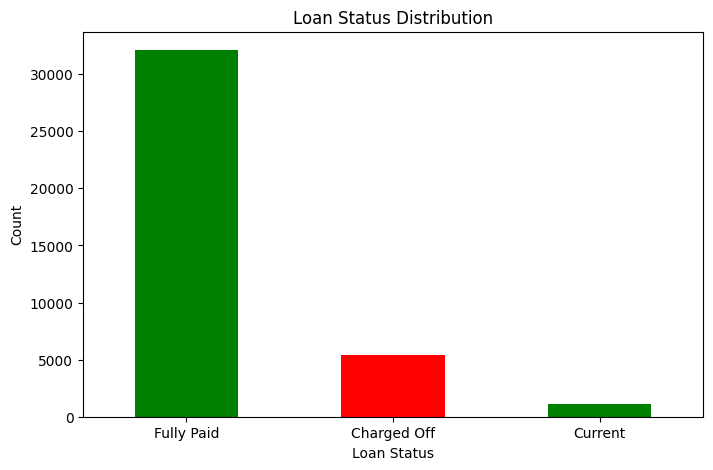

In [83]:
#Lets visualize whats the distribution of the target variable
# Bar Chart
plt.figure(figsize=(8, 5))
dset['loan_status'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

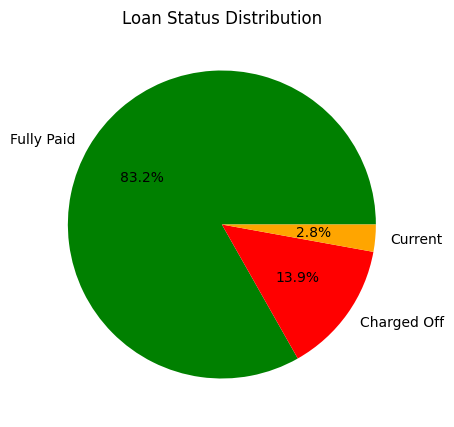

In [84]:
# Pie Chart
plt.figure(figsize=(8, 5))
dset['loan_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red',"orange"])
plt.title('Loan Status Distribution')
plt.ylabel('')
plt.show()

### Insight: Loan Status Distribution (Univariate)

**Observation:**
- ~83% of loans are **Fully Paid** and ~14% are **Charged Off** (defaulted)
- A small portion (~3%) are **Current** (will be filtered out for analysis)

**Key Finding:**
- The dataset is **imbalanced** — defaults are the minority class (~14%)
- This is typical in lending data and means even small differences in default rates across segments are meaningful

**Business Implication:**
- With ~14% overall default rate, LendingClub needs to identify which borrower segments have significantly higher rates


In [85]:
# Display column names, data types, and non-null counts for all columns
dset.info()

<class 'pandas.DataFrame'>
Index: 38595 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38595 non-null  int64  
 1   term                  38595 non-null  int64  
 2   int_rate              38595 non-null  float64
 3   installment           38595 non-null  float64
 4   grade                 38595 non-null  str    
 5   emp_length            38595 non-null  int64  
 6   home_ownership        38595 non-null  str    
 7   annual_inc            38595 non-null  float64
 8   verification_status   38595 non-null  str    
 9   loan_status           38595 non-null  str    
 10  purpose               38595 non-null  str    
 11  dti                   38595 non-null  float64
 12  delinq_2yrs           38595 non-null  int64  
 13  inq_last_6mths        38595 non-null  int64  
 14  open_acc              38595 non-null  int64  
 15  pub_rec               38595 non-nul

In [86]:
dset["term"].value_counts(normalize=True)*100

term
36    73.177873
60    26.822127
Name: proportion, dtype: float64

In [87]:
dset["int_rate"].value_counts(normalize=True)

int_rate
10.99    0.024148
13.49    0.021065
11.49    0.020728
7.51     0.019588
7.88     0.018163
7.49     0.016401
11.71    0.015261
9.99     0.015106
7.90     0.014484
5.42     0.013577
11.99    0.013370
12.69    0.012437
10.37    0.011711
12.42    0.011167
12.99    0.011167
8.49     0.011141
10.65    0.010908
6.03     0.010701
5.79     0.010105
8.90     0.009949
11.86    0.009924
14.27    0.009872
7.29     0.009820
6.62     0.009742
9.63     0.009535
10.59    0.009431
9.91     0.009043
5.99     0.008524
7.14     0.008473
12.53    0.008473
16.77    0.008317
11.11    0.008239
6.99     0.008188
10.74    0.007877
6.54     0.007851
6.91     0.007618
8.94     0.007618
13.61    0.007462
15.99    0.007177
13.98    0.007177
7.66     0.007099
13.23    0.006711
11.12    0.006503
13.99    0.006478
10.00    0.006348
11.36    0.006322
10.36    0.006296
12.68    0.006244
6.17     0.006167
10.75    0.006167
16.49    0.006089
11.83    0.006037
18.25    0.005804
10.62    0.005674
13.06    0.005571
1

In [88]:
dset["int_rate"].describe()

count    38595.000000
mean        12.048118
std          3.715935
min          5.420000
25%          9.320000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

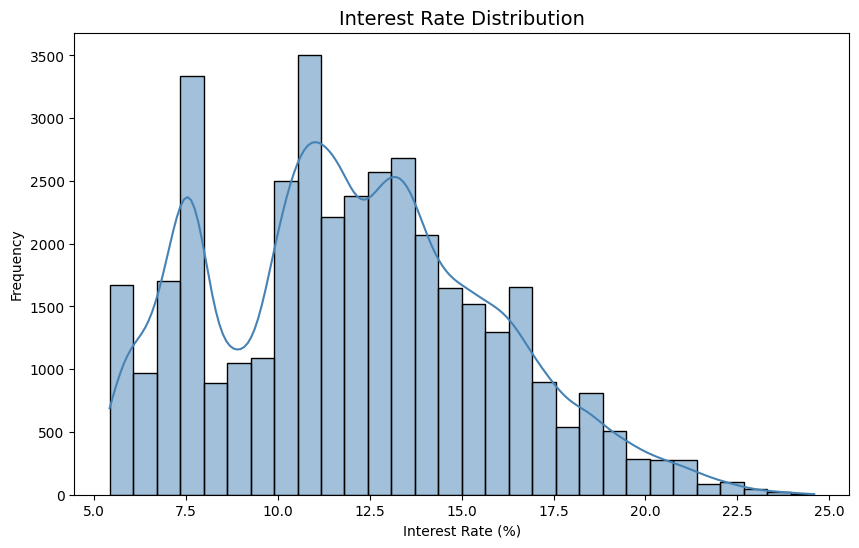

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(dset['int_rate'], bins=30, kde=True, color='steelblue')
plt.title('Interest Rate Distribution', fontsize=14)
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

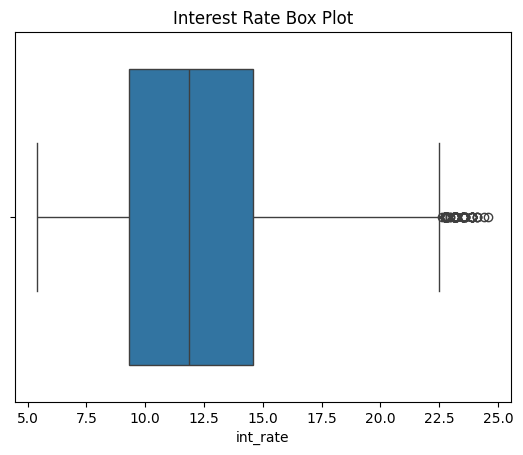

In [90]:
sns.boxplot(x=dset['int_rate'])
plt.title('Interest Rate Box Plot')
plt.show()

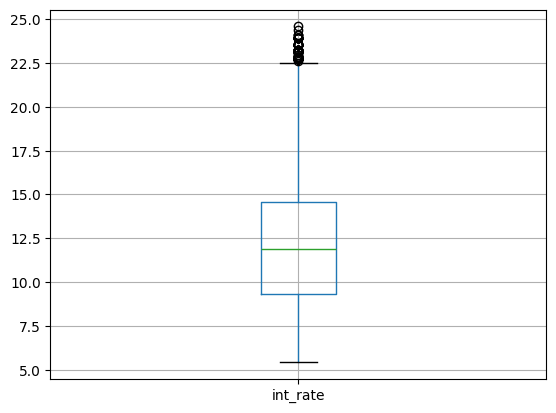

In [91]:
dset.boxplot(column='int_rate')
plt.show()

In [92]:
#lets check the outliers value if we can notice any anamoly
dset[dset["int_rate"]>23].head(25)
#None detected

loan_amnt  term  int_rate  installment grade  emp_length home_ownership  \
223       24250    60     23.91       519.76     G           7       MORTGAGE   
540       13000    60     23.52       370.38     G          10           RENT   
601       12375    60     23.13       349.79     G           5           RENT   
733       24925    60     23.91       715.75     G           4           RENT   
1156      29100    60     23.91       835.63     G           0           RENT   
1199      18250    60     23.52       519.95     G           6            OWN   
1619      24250    60     24.11       699.18     G           1       MORTGAGE   
1691      35000    60     23.13       989.29     G           3       MORTGAGE   
1799      25000    60     24.11       720.80     G           4       MORTGAGE   
2075      21575    60     23.91       619.55     G          10           RENT   
2447      26300    60     23.13       743.38     G           0       MORTGAGE   
2603      35000    60     23.91      1005.06     G          10           RENT   
2749      30000    60     23.52       854.71     G           3           RENT   
2801      14825    60     23.52       422.37     G           1           RENT   
3006      35000    60     23.52       997.16     G           0           RENT   
3017       5700    60     23.52       162.40     G           7       MORTGAGE   
3094      30000    60     23.13       847.96     G           3           RENT   
3655      25000    60     23.91       717.90     G           7           RENT   
4214      23200    60     23.52       660.97     G          10       MORTGAGE   
4314      18400    60     23.13       520.08     G          10       MORTGAGE   
4652      20000    60     23.91       574.32     G           0       MORTGAGE   
4873      12800    60     23.52       364.68     G           6       MORTGAGE   
5267      20000    60     23.91       574.32     G           0       MORTGAGE   
5284      25875    60     23.13       731.37     G          10       MORTGAGE   
5570      27300    60     23.13       771.65     G           3           RENT   

      annual_inc verification_status  loan_status             purpose    dti  \
223     120000.0            Verified   Fully Paid  debt_consolidation  12.96   
540      61000.0     Source Verified      Current  debt_consolidation  11.65   
601      40000.0        Not Verified  Charged Off               other  20.88   
733      60000.0            Verified   Fully Paid         credit_card  17.74   
1156     95000.0     Source Verified   Fully Paid  debt_consolidation  16.41   
1199     40000.0        Not Verified      Current  debt_consolidation  19.20   
1619    108000.0            Verified   Fully Paid         credit_card  12.27   
1691    220000.0     Source Verified  Charged Off    home_improvement  18.36   
1799    145000.0            Verified   Fully Paid         credit_card   8.30   
2075     54480.0     Source Verified   Fully Paid  debt_consolidation  18.50   
2447     65000.0     Source Verified  Charged Off         credit_card  15.06   
2603     81500.0            Verified  Charged Off  debt_consolidation  21.92   
2749    110000.0            Verified  Charged Off  debt_consolidation   8.54   
2801     45600.0     Source Verified  Charged Off  debt_consolidation  23.68   
3006    108600.0            Verified  Charged Off  debt_consolidation  21.20   
3017     95000.0     Source Verified   Fully Paid      small_business   5.66   
3094    102500.0            Verified  Charged Off  debt_consolidation  22.57   
3655    200000.0     Source Verified   Fully Paid  debt_consolidation   9.55   
4214     85000.0            Verified  Charged Off  debt_consolidation   7.89   
4314     75000.0            Verified  Charged Off               house   7.86   
4652     90000.0            Verified      Current  debt_consolidation  13.91   
4873     42000.0            Verified   Fully Paid  debt_consolidation  20.89   
5267    135000.0            Verified   Fully Paid  debt_con

### Insight: Interest Rate Distribution (Univariate)

**Observation:**
- Interest rates range from ~5% to ~25%, with a right-skewed distribution
- The median interest rate is around 12-13%
- Most loans are concentrated in the 8-16% range

**Key Finding:**
- The distribution has a clear right tail, meaning some borrowers pay significantly higher rates
- No extreme outliers detected beyond 23% - the range is reasonable for consumer lending

**Business Implication:**
- Higher interest rates are typically assigned to riskier borrowers - this will be validated in bivariate analysis


In [93]:
# Display column names, data types, and non-null counts for all columns
dset.info()

<class 'pandas.DataFrame'>
Index: 38595 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38595 non-null  int64  
 1   term                  38595 non-null  int64  
 2   int_rate              38595 non-null  float64
 3   installment           38595 non-null  float64
 4   grade                 38595 non-null  str    
 5   emp_length            38595 non-null  int64  
 6   home_ownership        38595 non-null  str    
 7   annual_inc            38595 non-null  float64
 8   verification_status   38595 non-null  str    
 9   loan_status           38595 non-null  str    
 10  purpose               38595 non-null  str    
 11  dti                   38595 non-null  float64
 12  delinq_2yrs           38595 non-null  int64  
 13  inq_last_6mths        38595 non-null  int64  
 14  open_acc              38595 non-null  int64  
 15  pub_rec               38595 non-nul

In [94]:
dset["installment"].value_counts(normalize=True)

installment
311.11     0.001762
311.02     0.001399
180.96     0.001373
150.80     0.001192
368.45     0.001166
372.12     0.001140
339.31     0.001088
330.76     0.001088
186.61     0.001062
317.72     0.001062
396.92     0.001010
276.06     0.001010
373.33     0.000985
365.23     0.000985
301.60     0.000985
310.10     0.000985
312.82     0.000985
187.69     0.000985
120.64     0.000959
325.74     0.000933
186.67     0.000933
322.63     0.000933
303.27     0.000933
155.56     0.000907
307.04     0.000881
315.63     0.000881
156.41     0.000881
316.11     0.000881
304.36     0.000855
203.59     0.000855
373.22     0.000855
196.41     0.000855
152.18     0.000829
386.70     0.000803
190.52     0.000803
187.75     0.000803
456.54     0.000803
361.92     0.000803
311.80     0.000803
162.87     0.000777
248.89     0.000777
98.92      0.000777
263.78     0.000777
248.82     0.000777
197.83     0.000777
161.32     0.000777
324.42     0.000777
182.62     0.000751
193.58     0.000751
304.18  

{'whiskers': [<matplotlib.lines.Line2D at 0x213b5d874d0>,
 'caps': [<matplotlib.lines.Line2D at 0x213b5d87950>,
 'boxes': [<matplotlib.lines.Line2D at 0x213b5da0800>],
 'medians': [<matplotlib.lines.Line2D at 0x213b5d87fb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x213b5ddde50>],
 'means': []}

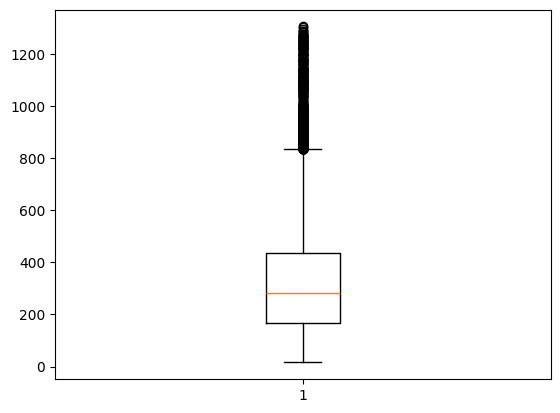

In [95]:
plt.boxplot(x=dset["installment"])

In [96]:
#lets check the outliers value if we can notice any anamoly
dset[dset["installment"]>900].head(30)
#None detected

loan_amnt  term  int_rate  installment grade  emp_length home_ownership  \
31        31825    36      7.90       995.82     A           5       MORTGAGE   
128       35000    36      8.90      1111.37     A           6       MORTGAGE   
185       35000    36     10.65      1140.07     B           2       MORTGAGE   
276       35000    36      8.90      1111.37     A           5           RENT   
309       28000    36     12.69       939.26     B           5           RENT   
431       35000    60     19.42       916.03     E           8           RENT   
446       26800    36     19.03       982.79     E          10       MORTGAGE   
507       30000    36     12.42      1002.46     B           2           RENT   
572       25000    36     19.42       921.72     E           2       MORTGAGE   
609       35000    36      8.90      1111.37     A          10       MORTGAGE   
717       28000    36     15.96       983.85     C           5       MORTGAGE   
756       35000    36     16.77      1243.85     D           7       MORTGAGE   
757       35000    36     14.27      1200.82     C           1       MORTGAGE   
844       32000    36      6.62       982.52     A           2           RENT   
866       35000    60     19.91       925.54     E           4       MORTGAGE   
873       30000    36     10.65       977.20     B           7       MORTGAGE   
887       35000    60     20.89       944.71     F           5           RENT   
962       35000    36      8.90      1111.37     A           3       MORTGAGE   
996       35000    60     20.30       933.14     E          10       MORTGAGE   
1019      28000    36     11.71       926.13     B           5       MORTGAGE   
1111      34000    36     17.58      1222.03     D           4           RENT   
1177      35000    60     20.89       944.71     F           0       MORTGAGE   
1182      35000    60     19.42       916.03     E           3       MORTGAGE   
1198      35000    60     18.64       901.01     E          10       MORTGAGE   
1253      35000    36      8.90      1111.37     A           3       MORTGAGE   
1277      30000    36      9.91       966.75     B          10           RENT   
1348      35000    36      7.90      1095.16     A           0       MORTGAGE   
1372      35000    60     22.35       973.64     F          10       MORTGAGE   
1473      31000    36     19.42      1142.94     E           2       MORTGAGE   
1529      35000    36      8.90      1111.37     A           2       MORTGAGE   

      annual_inc verification_status  loan_status             purpose    dti  \
31       75000.0            Verified   Fully Paid  debt_consolidation  14.03   
128     125000.0            Verified   Fully Paid  debt_consolidation  22.71   
185     168000.0            Verified   Fully Paid  debt_consolidation   3.17   
276      85000.0            Verified   Fully Paid  debt_consolidation  17.73   
309     100000.0     Source Verified   Fully Paid         credit_card  12.35   
431     195000.0            Verified      Current  debt_consolidation  11.72   
446      82000.0     Source Verified   Fully Paid         credit_card  21.59   
507      80000.0            Verified   Fully Paid  debt_consolidation  22.23   
572      92000.0            Verified   Fully Paid         credit_card  21.68   
609     106000.0            Verified   Fully Paid         credit_card  12.09   
717     235000.0     Source Verified   Fully Paid         credit_card   9.08   
756     100000.0            Verified   Fully Paid  debt_consolidation  19.03   
757     123000.0            Verified   Fully Paid         credit_card  19.34   
844     120000.0            Verified   Fully Paid      small_business   6.07   
866      69000.0            Verified      Current    home_improvement   9.41   
873     175000.0     Source Verified   Fully Paid  debt_consolidation  17.15   
887      90000.0     Source Verified  Charged Off  debt_consolidation   7.93   
962     114054.0            Verified   Fully Paid  deb

### Insight: Installment Distribution (Univariate)

**Observation:**
- Monthly installments vary widely, with most falling in the lower range
- Some high-value outliers exist (>/month) but appear to be legitimate large loans

**Key Finding:**
- Installment is directly derived from loan amount, interest rate, and term - so it is correlated with those features
- No anomalous outliers detected


In [97]:
dset["grade"].value_counts(normalize=True)*100

grade
B    30.275942
A    25.119834
C    20.505247
D    13.418837
E     7.213370
F     2.655784
G     0.810986
Name: proportion, dtype: float64

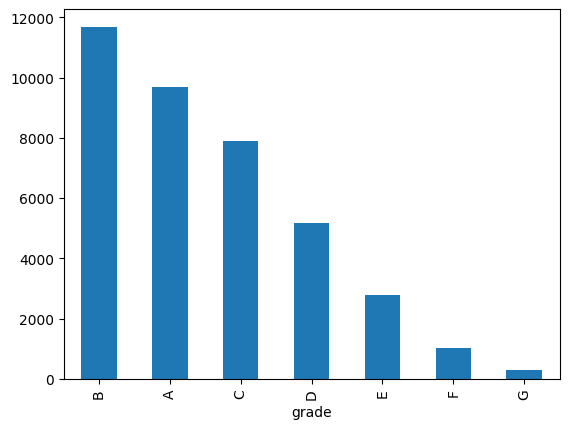

In [98]:
dset["grade"].value_counts().plot.bar()
plt.show()

### Insight: Loan Grade Distribution (Univariate)

**Observation:**
- Grade B has the highest number of loans, followed by A and C
- Grades F and G have very few loans — these are the riskiest categories
- The distribution follows a roughly normal pattern centered around B-C

**Key Finding:**
- LendingClub assigns most loans to moderate risk grades (A-C)
- The small number of F/G grade loans suggests stricter issuance criteria for high-risk borrowers

**Business Implication:**
- Although F and G grade loans are few in number, they may have disproportionately high default rates — to be verified in bivariate analysis


In [99]:
# Display column names, data types, and non-null counts for all columns
dset.info()

<class 'pandas.DataFrame'>
Index: 38595 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38595 non-null  int64  
 1   term                  38595 non-null  int64  
 2   int_rate              38595 non-null  float64
 3   installment           38595 non-null  float64
 4   grade                 38595 non-null  str    
 5   emp_length            38595 non-null  int64  
 6   home_ownership        38595 non-null  str    
 7   annual_inc            38595 non-null  float64
 8   verification_status   38595 non-null  str    
 9   loan_status           38595 non-null  str    
 10  purpose               38595 non-null  str    
 11  dti                   38595 non-null  float64
 12  delinq_2yrs           38595 non-null  int64  
 13  inq_last_6mths        38595 non-null  int64  
 14  open_acc              38595 non-null  int64  
 15  pub_rec               38595 non-nul

In [100]:
dset["annual_inc"].describe()

count    3.859500e+04
mean     6.963713e+04
std      6.424780e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.320000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [101]:
dset["annual_inc"].value_counts(normalize=True)*100

annual_inc
60000.00      3.813966
50000.00      2.681695
40000.00      2.225677
45000.00      2.098717
75000.00      2.080580
65000.00      2.057261
30000.00      2.044306
70000.00      1.873300
48000.00      1.808524
80000.00      1.691929
55000.00      1.671201
42000.00      1.533877
36000.00      1.526104
90000.00      1.466511
100000.00     1.318824
35000.00      1.300687
120000.00     1.274777
85000.00      1.251457
72000.00      1.235911
52000.00      1.018267
24000.00      0.961264
54000.00      0.935354
110000.00     0.808395
95000.00      0.730665
62000.00      0.681435
78000.00      0.639979
38000.00      0.619251
150000.00     0.616660
25000.00      0.598523
58000.00      0.562249
32000.00      0.557067
130000.00     0.551885
96000.00      0.538930
56000.00      0.536339
43000.00      0.531157
125000.00     0.528566
105000.00     0.523384
68000.00      0.515611
66000.00      0.510429
53000.00      0.494883
63000.00      0.494883
84000.00      0.484519
57000.00      0.481928


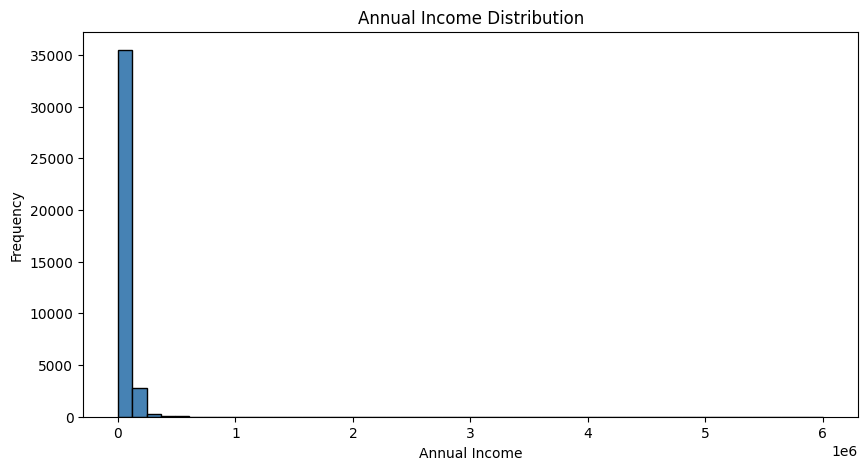

In [102]:
plt.figure(figsize=(10, 5))
plt.hist(dset['annual_inc'], bins=50, color='steelblue', edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

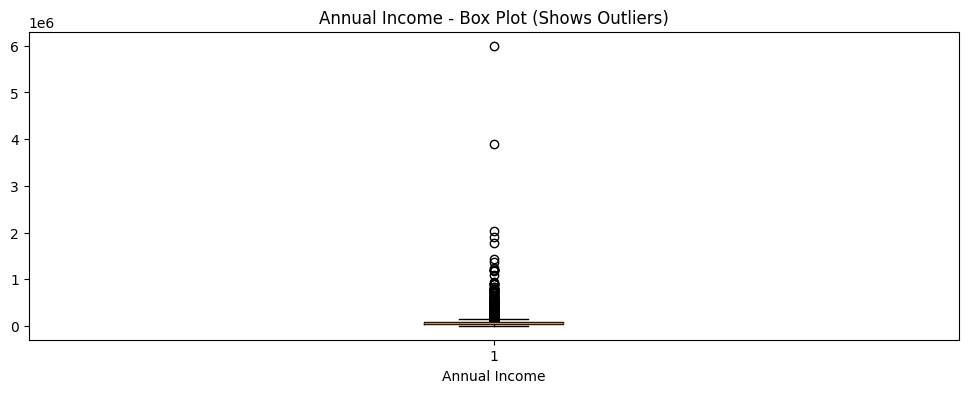

In [103]:
plt.figure(figsize=(12, 4))
plt.boxplot(dset['annual_inc'])
plt.title('Annual Income - Box Plot (Shows Outliers)')
plt.xlabel('Annual Income')
plt.show()

In [104]:
#The  above boxplot shows the presence of extreme number of out liers we can remove top 5% and further visualize.

95th percentile: 144,000


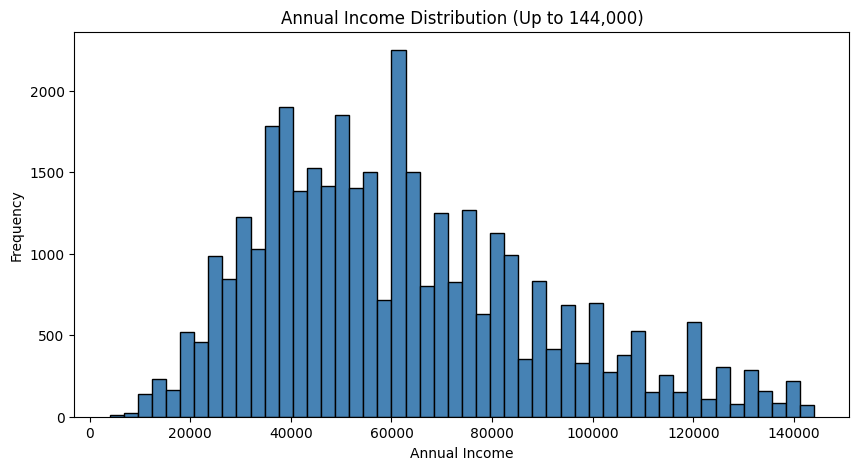

In [105]:
#Remove top 5% outliers for visualization
cap = dset['annual_inc'].quantile(0.95)
print(f"95th percentile: {cap:,.0f}")
plt.figure(figsize=(10, 5))
plt.hist(dset[dset['annual_inc'] <= cap]['annual_inc'], bins=50, color='steelblue', edgecolor='black')
plt.title(f'Annual Income Distribution (Up to {cap:,.0f})')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()


### Insight: Annual Income Distribution (Univariate)

**Observation:**
- Annual income is **heavily right-skewed** with extreme outliers (up to $6M+)
- The majority of borrowers earn between $30K and $100K
- After capping at 95th percentile, the distribution becomes more interpretable

**Key Finding:**
- Extreme income values exist but are NOT anomalies — they represent real high-income borrowers
- The median income is approximately $59K

**Business Implication:**
- Lower income borrowers may struggle with repayments — income vs default rate will be examined in bivariate analysis
- Outlier treatment (capping) will be needed for meaningful visualizations


In [106]:
#Lets analyze the dti column
dset["dti"].value_counts(normalize=True)*100

dti
0.00     0.430108
12.00    0.124368
18.00    0.114004
19.20    0.103640
12.48    0.098458
16.80    0.098458
13.20    0.098458
14.29    0.093276
15.00    0.090685
13.50    0.090685
4.80     0.085503
14.44    0.085503
9.60     0.085503
21.60    0.085503
6.00     0.085503
12.50    0.085503
20.40    0.085503
17.04    0.085503
10.64    0.082912
12.86    0.080321
15.60    0.080321
12.69    0.080321
14.97    0.080321
6.76     0.080321
8.40     0.077730
10.03    0.077730
8.88     0.077730
11.50    0.077730
7.80     0.077730
9.17     0.075139
11.04    0.075139
13.10    0.075139
15.63    0.075139
18.72    0.075139
15.31    0.075139
13.28    0.075139
16.32    0.075139
9.00     0.075139
23.52    0.075139
14.76    0.075139
10.00    0.072548
15.38    0.072548
6.65     0.072548
12.62    0.072548
12.54    0.072548
16.77    0.072548
10.80    0.072548
10.16    0.072548
17.40    0.072548
14.73    0.072548
14.36    0.072548
14.40    0.072548
15.55    0.072548
15.36    0.072548
22.43    0.072548
20.69 

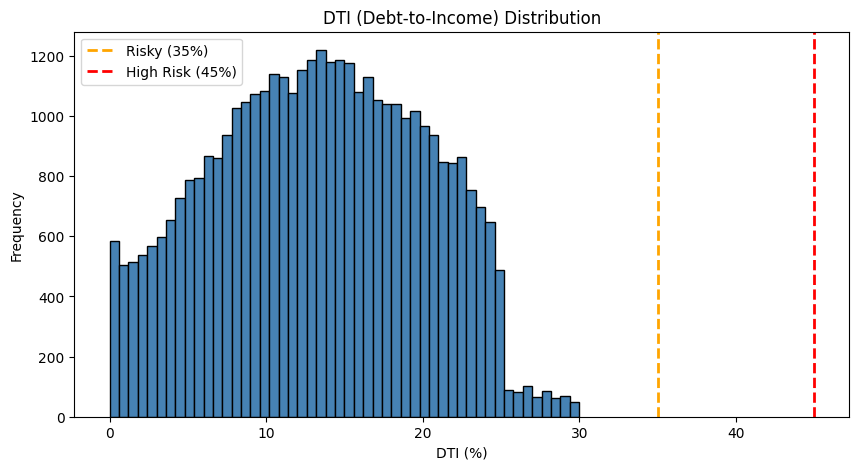

In [107]:
#Lets vizualize
plt.figure(figsize=(10, 5))
plt.hist(dset['dti'], bins=50, color='steelblue', edgecolor='black')
plt.title('DTI (Debt-to-Income) Distribution')
plt.xlabel('DTI (%)')
plt.ylabel('Frequency')
# Add risk threshold lines
plt.axvline(x=35, color='orange', linestyle='--', linewidth=2, label='Risky (35%)')
plt.axvline(x=45, color='red', linestyle='--', linewidth=2, label='High Risk (45%)')
plt.legend()
plt.show()


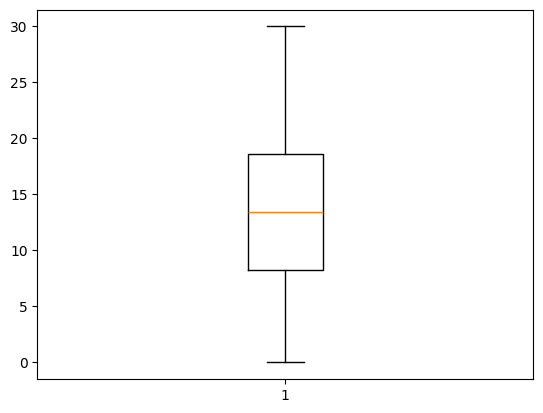

In [108]:
plt.boxplot(dset["dti"])
plt.show()#No outliers as such we have detected

### Insight: DTI (Debt-to-Income) Distribution (Univariate)

**Observation:**
- DTI ranges from 0 to ~30, with most values between 5 and 25
- The distribution is roughly normal/uniform
- No significant outliers detected

**Key Finding:**
- DTI is a clean variable with no extreme values — it can be used directly in analysis
- Higher DTI indicates borrowers are already carrying more existing debt relative to income

**Business Implication:**
- High DTI borrowers may have difficulty managing additional loan payments — a potential default risk factor


In [109]:
#Lets analyze  the "loan amount" column
dset["loan_amnt"].value_counts(normalize=True)


loan_amnt
10000    0.071615
12000    0.059464
5000     0.051198
15000    0.048193
6000     0.048037
20000    0.041482
8000     0.039850
25000    0.035523
4000     0.028320
7000     0.025651
3000     0.025392
16000    0.020987
35000    0.017334
9000     0.017256
18000    0.016427
14000    0.016297
7500     0.013732
2000     0.012800
24000    0.012126
4800     0.010545
13000    0.010209
2500     0.009820
30000    0.009716
9600     0.008965
7200     0.008835
3500     0.008473
11000    0.007669
3600     0.007281
1500     0.007255
4500     0.007229
1000     0.006944
6500     0.006529
21000    0.006322
5500     0.006244
2400     0.006089
8500     0.005985
14400    0.005882
17000    0.005804
8400     0.005519
5600     0.005467
4200     0.005467
6400     0.005234
22000    0.004508
3200     0.004301
28000    0.003809
11200    0.003679
24250    0.003446
1200     0.003213
2800     0.003135
12500    0.003006
14500    0.002954
12800    0.002876
19000    0.002850
10800    0.002721
9500     0.002721


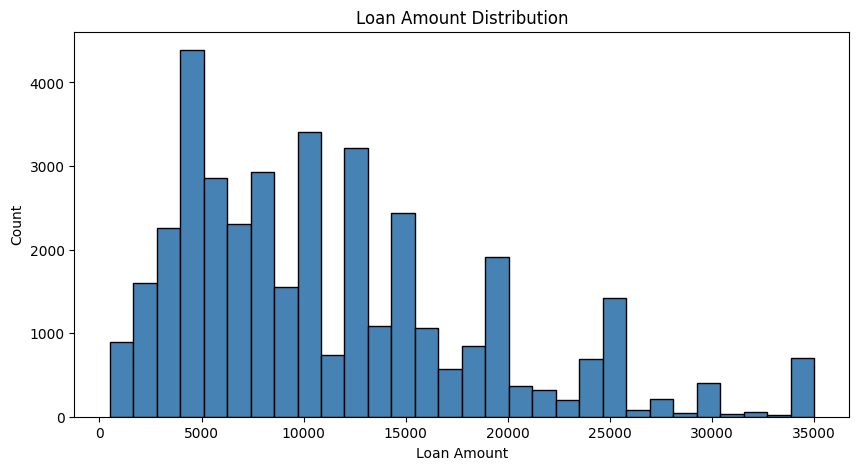

In [110]:
#Plot a histogram
plt.figure(figsize=(10, 5))
plt.hist(dset['loan_amnt'], bins=30, color='steelblue', edgecolor='black')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

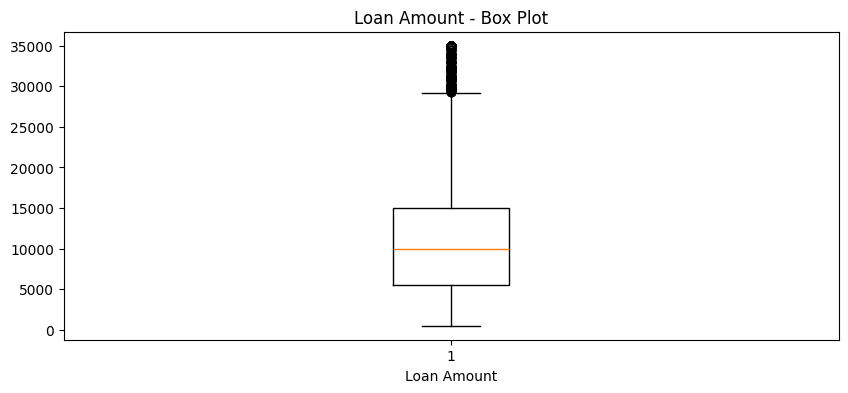

In [111]:
plt.figure(figsize=(10, 4))
plt.boxplot(dset['loan_amnt'])
plt.title('Loan Amount - Box Plot')
plt.xlabel('Loan Amount')
plt.show()
#Outliers are present lets check is there any anomaly where value=Outlier

In [112]:
dset[dset["loan_amnt"]>30000].head(30)

loan_amnt  term  int_rate  installment grade  emp_length home_ownership  \
31        31825    36      7.90       995.82     A           5       MORTGAGE   
80        35000    60     17.27       551.84     D           3       MORTGAGE   
128       35000    36      8.90      1111.37     A           6       MORTGAGE   
185       35000    36     10.65      1140.07     B           2       MORTGAGE   
268       35000    60     18.64       690.56     E           8       MORTGAGE   
276       35000    36      8.90      1111.37     A           5           RENT   
306       35000    60     20.30       619.88     E           5           RENT   
336       35000    60     17.27       578.71     D           8       MORTGAGE   
387       35000    60     12.42       619.26     B           9       MORTGAGE   
430       33425    60     13.49       475.63     C           2       MORTGAGE   
431       35000    60     19.42       916.03     E           8           RENT   
496       35000    60     20.30       619.88     E           3            OWN   
609       35000    36      8.90      1111.37     A          10       MORTGAGE   
681       35000    60     12.42       489.57     B          10           RENT   
702       35000    60     11.71       470.14     B           8           RENT   
713       35000    60     19.03       572.36     E          10       MORTGAGE   
751       35000    60     20.30       581.88     E           2       MORTGAGE   
756       35000    36     16.77      1243.85     D           7       MORTGAGE   
757       35000    36     14.27      1200.82     C           1       MORTGAGE   
765       35000    60     20.89       576.27     F          10       MORTGAGE   
836       35000    60     19.03       593.77     E           4       MORTGAGE   
844       32000    36      6.62       982.52     A           2           RENT   
866       35000    60     19.91       925.54     E           4       MORTGAGE   
887       35000    60     20.89       944.71     F           5           RENT   
962       35000    36      8.90      1111.37     A           3       MORTGAGE   
996       35000    60     20.30       933.14     E          10       MORTGAGE   
1004      35000    60     12.42       495.19     B           3       MORTGAGE   
1014      35000    60     19.03       586.63     E          10       MORTGAGE   
1085      34475    60     14.27       807.01     C           8           RENT   
1096      35000    60     11.71       516.00     B           3       MORTGAGE   

      annual_inc verification_status  loan_status             purpose    dti  \
31      75000.00            Verified   Fully Paid  debt_consolidation  14.03   
80     150000.00            Verified   Fully Paid    home_improvement   7.51   
128    125000.00            Verified   Fully Paid  debt_consolidation  22.71   
185    168000.00            Verified   Fully Paid  debt_consolidation   3.17   
268     85000.00            Verified   Fully Paid  debt_consolidation  12.00   
276     85000.00            Verified   Fully Paid  debt_consolidation  17.73   
306     85000.00            Verified   Fully Paid  debt_consolidation  20.16   
336    208000.00     Source Verified   Fully Paid  debt_consolidation   7.94   
387    105000.00            Verified   Fully Paid    home_improvement  16.53   
430     75000.00     Source Verified  Charged Off  debt_consolidation  25.71   
431    195000.00            Verified      Current  debt_consolidation  11.72   
496     85000.00            Verified  Charged Off  debt_consolidation  16.39   
609    106000.00            Verified   Fully Paid         credit_card  12.09   
681     90000.00            Verified      Current  debt_consolidation  26.33   
702     70000.00            Verified      Current  debt_consolidation  19.42   
713    140000.00            Verified      Current      small_business   4.29   
751    100000.00            Verified   Fully Paid             wedding  24.71   
756    100000.00            Verified   Fully Paid  deb

### Insight: Loan Amount Distribution (Univariate)

**Observation:**
- Loan amounts range from ~ to ~,000
- The distribution shows peaks at round numbers (, , , etc.)
- Borrowers tend to request loans in round amounts

**Key Finding:**
- Most loans are in the - range
- Larger loans (>) are relatively rare but not anomalous

**Business Implication:**
- Larger loan amounts may carry higher default risk - to be checked in bivariate analysis


In [113]:
#Lets analyze "home_ownership" column
dset["home_ownership"].value_counts(normalize=True)*100

home_ownership
RENT        47.822257
MORTGAGE    44.573131
OWN          7.348102
OTHER        0.248737
NONE         0.007773
Name: proportion, dtype: float64

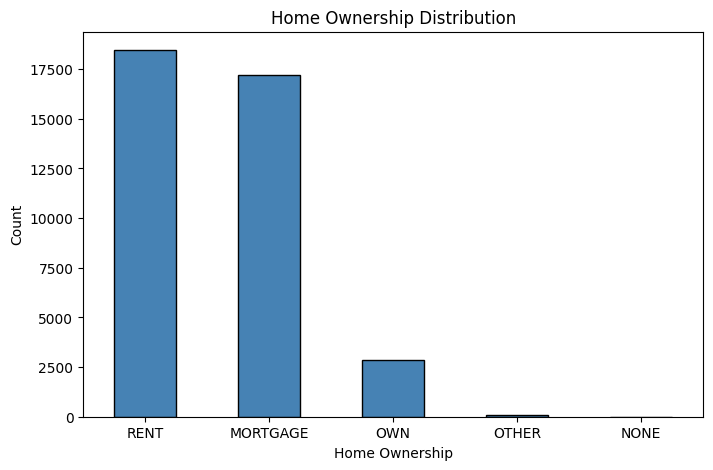

In [114]:
plt.figure(figsize=(8, 5))
dset['home_ownership'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Home Ownership Distribution')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

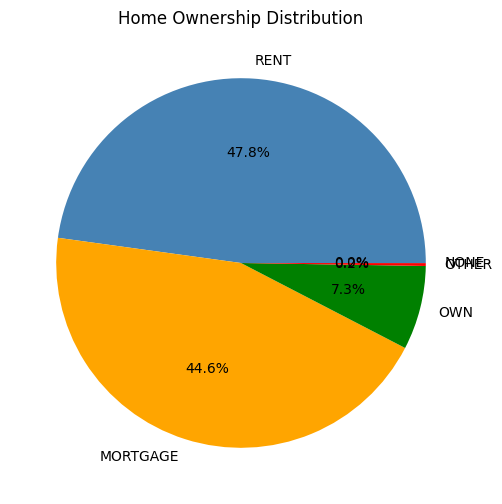

In [115]:
plt.figure(figsize=(8, 6))
dset['home_ownership'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['steelblue', 'orange', 'green', 'red'])
plt.title('Home Ownership Distribution')
plt.ylabel('')
plt.show()


### Insight: Home Ownership Distribution (Univariate)

**Observation:**
- ~44.6% of borrowers have a **Mortgage**, ~47.8% **Rent**, and ~7.6% **Own** their homes outright
- Very few fall into "Other" or "None" categories

**Key Finding:**
- The vast majority of borrowers are either renting or paying a mortgage
- Outright homeowners are a small minority

**Business Implication:**
- Home ownership status may influence default risk — mortgage holders have demonstrated financial commitment


In [116]:
#Lets analyze the purpose of loan column
dset["purpose"].value_counts(normalize=True)*100

purpose
debt_consolidation    47.236689
credit_card           12.949864
other                  9.897655
home_improvement       7.451742
major_purchase         5.464438
small_business         4.617178
car                    3.873559
wedding                2.417412
medical                1.725612
moving                 1.443192
house                  0.953491
vacation               0.909444
educational            0.813577
renewable_energy       0.246146
Name: proportion, dtype: float64

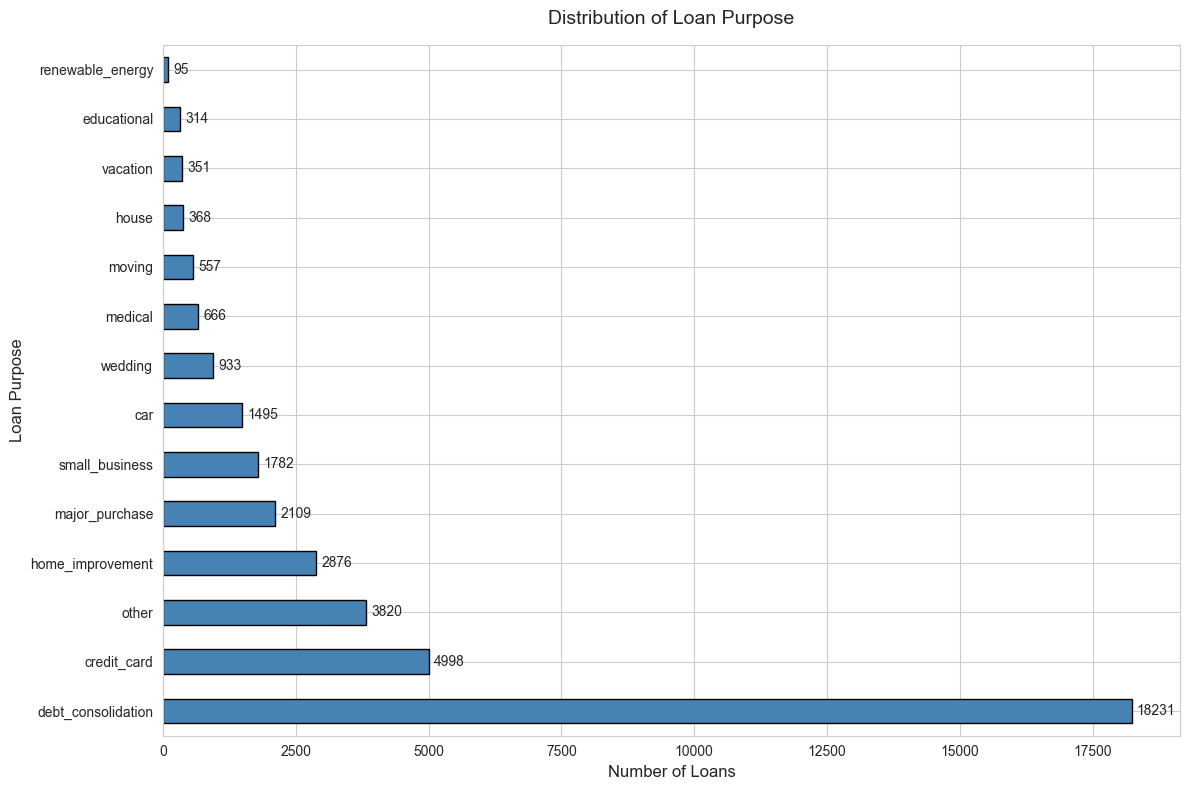

In [117]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
# Horizontal Bar Chart
ax = dset['purpose'].value_counts().plot(kind='barh', color='steelblue', edgecolor='black')
# Titles and Labels
plt.title('Distribution of Loan Purpose', fontsize=14, pad=15)
plt.xlabel('Number of Loans', fontsize=12)
plt.ylabel('Loan Purpose', fontsize=12)
# Add value labels on bars
for i, v in enumerate(dset['purpose'].value_counts()):
    ax.text(v + 100, i, str(v), va='center', fontsize=10)
plt.tight_layout()
plt.show()

### Insight: Loan Purpose Distribution (Univariate)

**Observation:**
- **Debt consolidation** is by far the most common purpose (~47%)
- **Credit card** refinancing is second (~12%)
- Other purposes like home improvement, major purchase, and small business have smaller shares

**Key Finding:**
- Nearly half of all loans are for debt consolidation — borrowers are restructuring existing debt
- This suggests many borrowers already have financial stress before taking these loans

**Business Implication:**
- Some purposes may be riskier than others — small business loans, in particular, should be examined further


In [118]:
#Lets analyze the emp_length column
dset["emp_length"].value_counts(normalize=True)*100

emp_length
10    23.002980
0     11.843503
2     11.356393
3     10.599819
4      8.884571
5      8.493328
1      8.379324
6      5.767586
7      4.586086
8      3.826921
9      3.259490
Name: proportion, dtype: float64

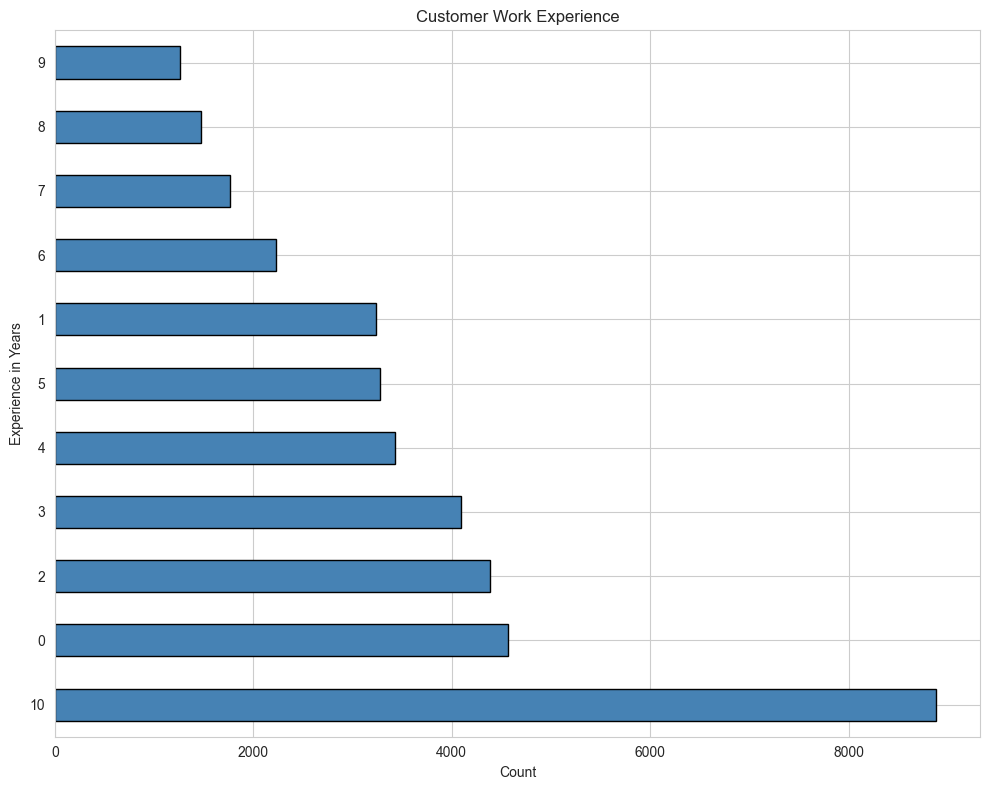

In [119]:
plt.figure(figsize=(10, 8))
dset['emp_length'].value_counts().plot(kind='barh', color='steelblue', edgecolor='black')
plt.title('Customer Work Experience')
plt.xlabel('Count')
plt.ylabel('Experience in Years')
plt.tight_layout()
plt.show()


### Insight: Employment Length Distribution (Univariate)

**Observation:**
- **10+ years** of work experience is the largest group (~24%)
- The remaining categories (1-9 years and <1 year) are fairly evenly distributed

**Key Finding:**
- Employment length is reasonably well-distributed across categories
- There is no strong skew toward any particular experience level (except 10+)

**Business Implication:**
- The relationship between employment length and default risk needs to be examined — job stability may or may not be protective


In [120]:
dset["revol_util"].value_counts(normalize=True)*100

revol_util
0.00     2.438140
0.20     0.160643
63.00    0.158052
66.70    0.147688
40.70    0.147688
61.00    0.145097
0.10     0.145097
66.60    0.145097
31.20    0.142506
64.80    0.142506
70.40    0.142506
37.60    0.142506
46.40    0.142506
78.70    0.139914
32.00    0.139914
68.60    0.139914
48.90    0.139914
57.40    0.137323
70.80    0.137323
76.60    0.137323
25.50    0.137323
51.60    0.137323
68.70    0.137323
65.90    0.137323
46.60    0.137323
27.20    0.137323
62.80    0.137323
48.00    0.134732
54.30    0.134732
49.80    0.134732
75.50    0.134732
41.00    0.134732
64.60    0.134732
55.80    0.134732
35.30    0.134732
89.50    0.134732
70.10    0.134732
55.10    0.134732
51.50    0.134732
45.60    0.134732
55.50    0.132141
66.90    0.132141
74.90    0.132141
35.70    0.132141
66.10    0.132141
72.10    0.132141
41.60    0.132141
29.10    0.132141
48.20    0.132141
54.60    0.132141
45.90    0.129550
43.40    0.129550
57.90    0.129550
60.20    0.129550
47.80    0.129550

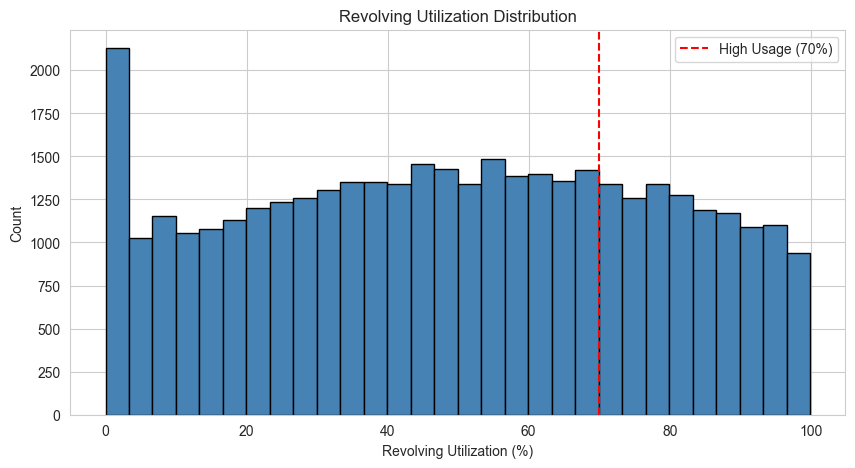

In [121]:
plt.figure(figsize=(10, 5))
plt.hist(dset['revol_util'], bins=30, color='steelblue', edgecolor='black')
plt.title('Revolving Utilization Distribution')
plt.xlabel('Revolving Utilization (%)')
plt.ylabel('Count')
plt.axvline(x=70, color='red', linestyle='--', label='High Usage (70%)')
plt.legend()
plt.show()

### Insight: Revolving Utilization Distribution (Univariate)

**Observation:**
- Revolving utilization shows a wide spread from 0% to over 100%
- Values over 100% indicate borrowers who are over their credit limit
- The distribution is roughly uniform with a right tail

**Key Finding:**
- High revolving utilization (maxing out credit cards) is a classic sign of financial distress
- Some borrowers exceed their credit limits

**Business Implication:**
- High utilization borrowers may default more frequently — a strong candidate for bivariate analysis


In [122]:
#Lets analyze the term column
dset["term"].value_counts(normalize=True)*100

term
36    73.177873
60    26.822127
Name: proportion, dtype: float64

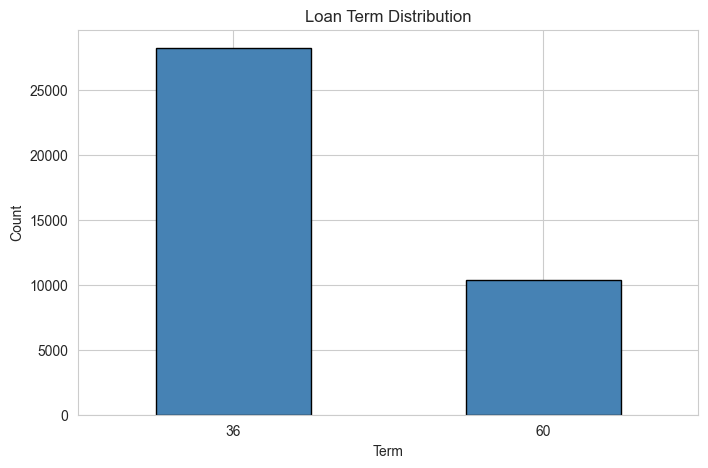

In [123]:
plt.figure(figsize=(8, 5))
dset['term'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Loan Term Distribution')
plt.xlabel('Term')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

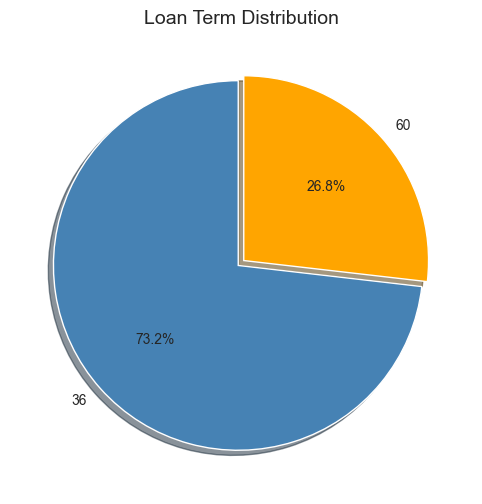

In [124]:
plt.figure(figsize=(8, 6))
dset['term'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=['steelblue', 'orange'],
    explode=[0.02, 0.02],  # Slight separation
    shadow=True,
    startangle=90
)
plt.title('Loan Term Distribution', fontsize=14)
plt.ylabel('')
plt.show()

### Insight: Loan Term Distribution (Univariate)

**Observation:**
- ~73% of loans have a **36-month** term
- ~27% have a **60-month** term

**Key Finding:**
- Shorter-term loans (36 months) are much more popular
- Longer terms mean more interest paid and more time for borrower circumstances to change

**Business Implication:**
- 60-month loans carry more risk due to longer exposure period — default rate comparison needed


In [125]:
#"Verification_status" column
dset["verification_status"].value_counts(normalize=True)*100


verification_status
Not Verified       42.673921
Verified           31.986009
Source Verified    25.340070
Name: proportion, dtype: float64

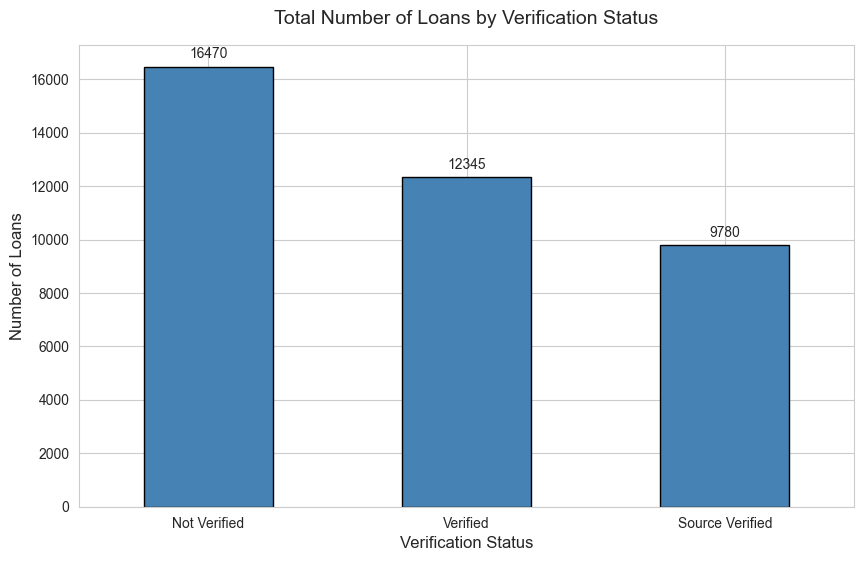

In [126]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
# Plotting the Bar Graph
ax = dset['verification_status'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
# Adding Titles and Labels
plt.title('Total Number of Loans by Verification Status', fontsize=14, pad=15)
plt.xlabel('Verification Status', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)
plt.xticks(rotation=0)
# Adding values on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

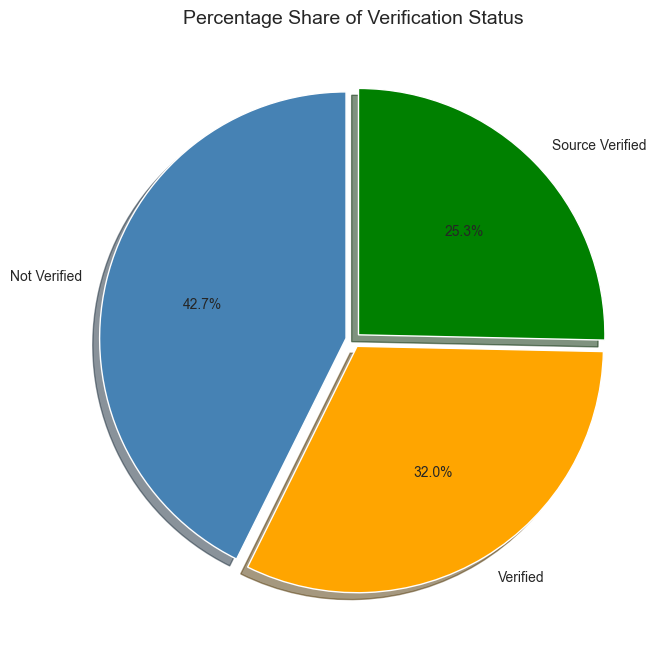

In [127]:
# Plotting the Pie Chart
plt.figure(figsize=(8, 8))

dset['verification_status'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=['steelblue', 'orange', 'green'], 
    startangle=90,
    explode=[0.03, 0.03, 0.03], # Separation for better visibility
    shadow=True
)

plt.title('Percentage Share of Verification Status', fontsize=14)
plt.ylabel('') # Hide the vertical label
plt.show()

### Insight: Verification Status Distribution (Univariate)

**Observation:**
- Roughly equal split between Not Verified (42.7%), Source Verified (25.3%), and Verified (32%)

**Key Finding:**
- A significant portion of borrowers (42.7%) are not verified at all
- Verification is triggered for borrowers that appear potentially risky

**Business Implication:**
- Counter-intuitively, verified borrowers may actually have higher default rates (because verification is triggered by risk signals)


## 6. Bivariate Analysis

In this section, we examine the relationship between each feature and the target variable 
(`is_default`). For each categorical feature, we calculate the **default rate** (percentage 
of loans that defaulted) within each category. For numerical features, we first create bins 
and then calculate default rates per bin.

**Methodology:**
- For categorical variables: `groupby(feature)['is_default'].mean() * 100`
- For numerical variables: Create bins using `pd.cut()`, then calculate default rates per bin
- Visualize using bar plots and box plots

**Goal:** Identify which features are the strongest predictors of loan default.


In [128]:

dset_final = dset[dset['loan_status'] != 'Current']
#  Now create the binary target column
dset_final['is_default'] = dset_final['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

print(dset_final['is_default'].value_counts())
print(dset_final.shape)


is_default
0    32113
1     5384
Name: count, dtype: int64
(37497, 21)


What we're doing:

Filtering out "Current" loans — these loans are still ongoing and haven't reached a final outcome (neither Fully Paid nor Charged Off). Since we can't know if they'll default or not, they're excluded to avoid noise in the analysis.
Creating a binary target column (is_default) — the original loan_status column has text values ("Fully Paid", "Charged Off"). We convert this to a numeric binary column: 1 = Charged Off (defaulted), 0 = Fully Paid.
Why it's necessary:

To calculate default rates (e.g., groupby('grade')['is_default'].mean()) we need a numeric 0/1 column — you can't take the mean of text values.
Removing "Current" loans ensures we only analyze loans with a definitive outcome.


In [129]:
# Calculate default rate per grade
dset_final.groupby('grade')['is_default'].mean() * 100

grade
A     5.776398
B    11.929917
C    16.782030
D    21.801330
E    26.676888
F    32.494759
G    33.108108
Name: is_default, dtype: float64

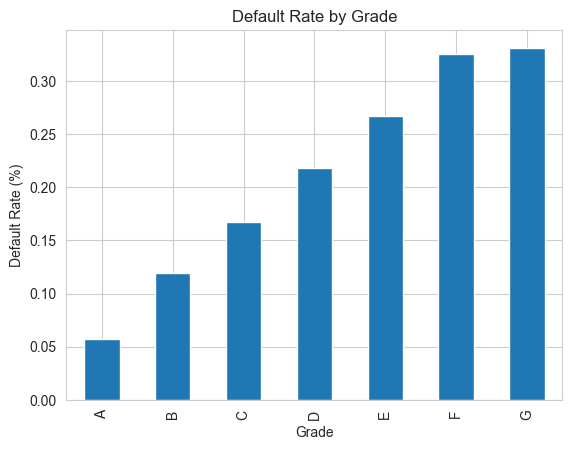

In [130]:
# Plot default rate by grade
dset_final.groupby('grade')['is_default'].mean().plot(kind='bar')
plt.title('Default Rate by Grade')
plt.ylabel('Default Rate (%)')
plt.xlabel('Grade')
plt.show()

### INSIGHT: Grade vs Default Rate (Bivariate Analysis)
**OBSERVATION:**
- Grade A has the lowest default rate (~5.5%)
- Grade G has the highest default rate (~33%)
- Default rate increases monotonically from Grade A to Grade G

**KEY FINDING:**
- LendingClub's internal grading system is VALID and accurately predicts risk
- Each grade step increases default probability by approximately 5-6%

**BUSINESS RECOMMENDATION:**
- Grade F and G loans have default rates above 30% - very risky
- Consider stricter approval criteria for Grade E, F, G loans
- Higher interest rates for lower grades are justified by higher risk

============================================================================


In [131]:
# Calculate default rate per purpose
dset_final.groupby('purpose')['is_default'].mean() * 100

purpose
car                   10.650069
credit_card           10.394119
debt_consolidation    15.138134
educational           16.560510
home_improvement      11.790079
house                 16.666667
major_purchase        10.125362
medical               15.290520
moving                15.272727
other                 16.000000
renewable_energy      19.148936
small_business        27.033353
vacation              14.409222
wedding               10.087719
Name: is_default, dtype: float64

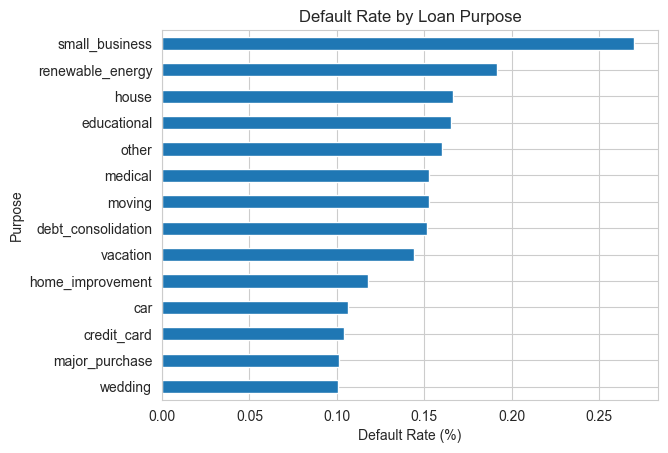

In [132]:
# Plot default rate by purpose (horizontal bar for readability)
dset_final.groupby('purpose')['is_default'].mean().sort_values().plot(kind='barh')
plt.title('Default Rate by Loan Purpose')
plt.xlabel('Default Rate (%)')
plt.ylabel('Purpose')
plt.show()

### INSIGHT: Purpose vs Default Rate (Bivariate Analysis)
**OBSERVATION:**
**HIGH RISK PURPOSES (Default Rate > 15%):**
- small_business: ~27% (HIGHEST - almost 3x the lowest)
- renewable_energy: ~19%
- house: ~17%
- educational: ~17%
- other: ~16%
- medical: ~15%
- moving: ~15%
**LOW RISK PURPOSES (Default Rate < 15%):**
- debt_consolidation: ~15%
- vacation: ~14%
- home_improvement: ~12%
- car: ~11%
- credit_card: ~10%
- major_purchase: ~10%
- wedding: ~10% (LOWEST)
**KEY FINDING:**
- Small Business loans are the RISKIEST with 27% default rate
- Wedding and Major Purchase loans are SAFEST with ~10% default rate
- "Other" category is risky - unclear purpose = unclear repayment ability
**BUSINESS RECOMMENDATION:**
- Apply stricter approval criteria for Small Business loans
- Consider higher interest rates for high-risk purposes
- Flag "other" purpose loans for manual review
============================================================================


In [133]:
# Calculate default rate per home ownership
dset_final.groupby('home_ownership')['is_default'].mean() * 100

home_ownership
MORTGAGE    13.517424
NONE         0.000000
OTHER       18.750000
OWN         14.394213
RENT        15.105004
Name: is_default, dtype: float64

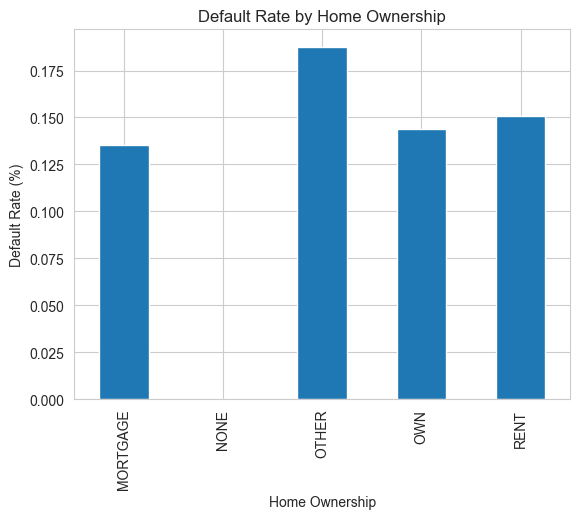

In [134]:
#Plot default rate by home ownership
dset_final.groupby('home_ownership')['is_default'].mean().plot(kind='bar')
plt.title('Default Rate by Home Ownership')
plt.ylabel('Default Rate (%)')
plt.xlabel('Home Ownership')
plt.show()

### INSIGHT: Home Ownership vs Default Rate (Bivariate Analysis)
**OBSERVATION:**
- MORTGAGE: ~13.5% (LOWEST among main categories)
- NONE: 0% (Very few records - not statistically significant)
- OTHER: ~18.5% (HIGHEST)
- OWN: ~14.5%
- RENT: ~15%

**KEY FINDING:**
- Borrowers with MORTGAGE have the lowest default rate
- "OTHER" category has highest default rate - unclear status = higher risk
- RENT vs OWN difference is minimal (~0.5%)
- Contrary to expectation, OWN is not significantly safer than RENT

**BUSINESS RECOMMENDATION:**
- MORTGAGE holders are slightly safer - they have asset commitment
- Flag "OTHER" home ownership for additional verification
- Home ownership alone is NOT a strong predictor of default
- Should be used in combination with other factors (income, DTI)

============================================================================


In [135]:
# Calculate default rate per verification status
dset_final.groupby('verification_status')['is_default'].mean() * 100

verification_status
Not Verified       12.566154
Source Verified    14.689444
Verified           16.567494
Name: is_default, dtype: float64

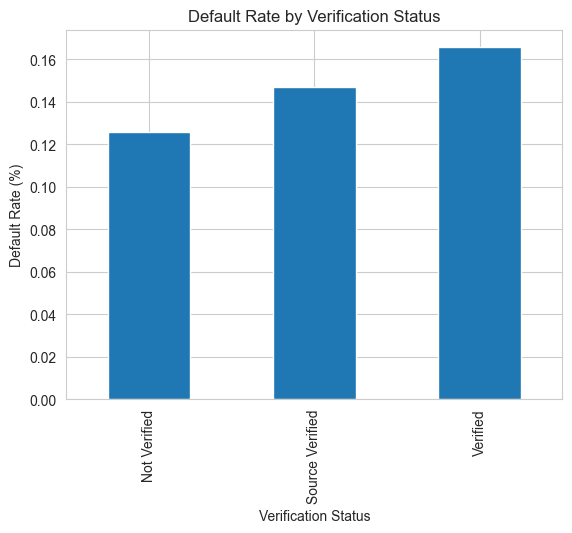

In [136]:
# Plot default rate by verification status
dset_final.groupby('verification_status')['is_default'].mean().plot(kind='bar')
plt.title('Default Rate by Verification Status')
plt.ylabel('Default Rate (%)')
plt.xlabel('Verification Status')
plt.show()

### INSIGHT: Verification Status vs Default Rate (Bivariate Analysis)
**OBSERVATION:**
- Not Verified: ~12.5% (LOWEST)
- Source Verified: ~14.5%
- Verified: ~16.5% (HIGHEST)

**KEY FINDING (COUNTER-INTUITIVE):**
- Verified borrowers have HIGHER default rate than Not Verified!
- This seems opposite to expectation but is a classic lending pattern

**WHY THIS HAPPENS:**
- Verification is TRIGGERED for riskier borrowers
- If initial application looks suspicious, lender verifies income
- Low-risk borrowers often don't need verification
- So "Verified" group already contains higher-risk profiles

**BUSINESS RECOMMENDATION:**
- Verification status alone does NOT reduce default risk
- It is an indicator that borrower was flagged for review
- Should NOT be used as a safety indicator
- Focus on underlying factors (income, DTI) instead

============================================================================


In [137]:
# Calculate default rate per employment length
dset_final.groupby('emp_length')['is_default'].mean() * 100

emp_length
0     14.123665
1     14.321846
2     13.205786
3     13.847305
4     13.793103
5     14.326019
6     14.087760
7     15.398126
8     14.096301
9     12.887439
10    15.671026
Name: is_default, dtype: float64

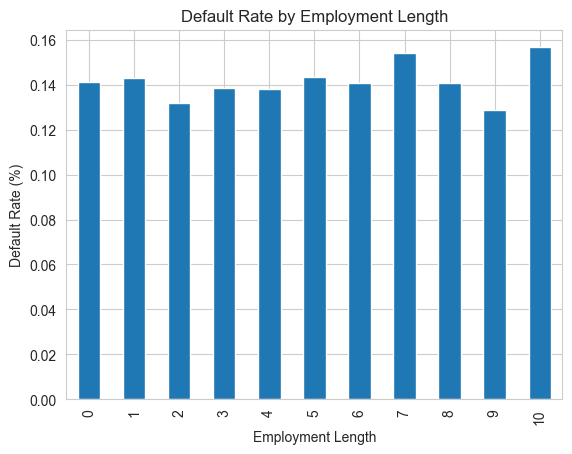

In [138]:
# Plot default rate by employment length
dset_final.groupby('emp_length')['is_default'].mean().plot(kind='bar')
plt.title('Default Rate by Employment Length')
plt.ylabel('Default Rate (%)')
plt.xlabel('Employment Length')
plt.show()

### INSIGHT: Employment Length vs Default Rate (Bivariate Analysis)
**OBSERVATION:**
- All employment lengths have similar default rates (~13% to 15.5%)
- 0 years: ~14%
- 2 years: ~13.2% (lowest)
- 9 years: ~13% (lowest)
- 7 years: ~15.3%
- 10+ years: ~15.5% (highest)

**KEY FINDING:**
- NO clear pattern between employment length and default rate
- Job stability does NOT predict default risk in this dataset
- Even 10+ year employees have similar/higher default rates

**WHY THIS HAPPENS:**
- Employment length ≠ financial discipline
- Someone employed 10 years can still overspend
- Job security doesn't guarantee repayment ability

**BUSINESS RECOMMENDATION:**
- Employment length is a WEAK predictor of default
- Should NOT be given high weight in risk models
- Focus on income, DTI, and credit history instead

============================================================================


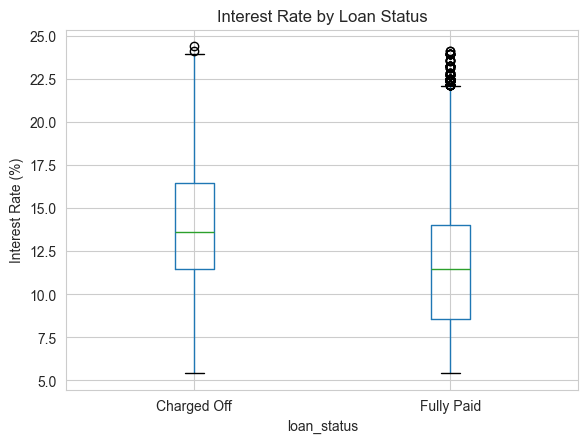

In [139]:
# Box plot of interest rate by loan status
dset_final.boxplot(column='int_rate', by='loan_status')
plt.title('Interest Rate by Loan Status')
plt.suptitle('')
plt.ylabel('Interest Rate (%)')
plt.show()

In [140]:
# Create interest rate bins
dset_final['int_rate_bin'] = pd.cut(dset_final['int_rate'], bins=[0, 10, 15, 20, 30], labels=['Low (0-10%)', 'Medium (10-15%)', 'High (15-20%)', 'Very High (20%+)'])

# Calculate default rate per bin
dset_final.groupby('int_rate_bin')['is_default'].mean() * 100

int_rate_bin
Low (0-10%)          6.447524
Medium (10-15%)     14.539245
High (15-20%)       24.634389
Very High (20%+)    38.126649
Name: is_default, dtype: float64

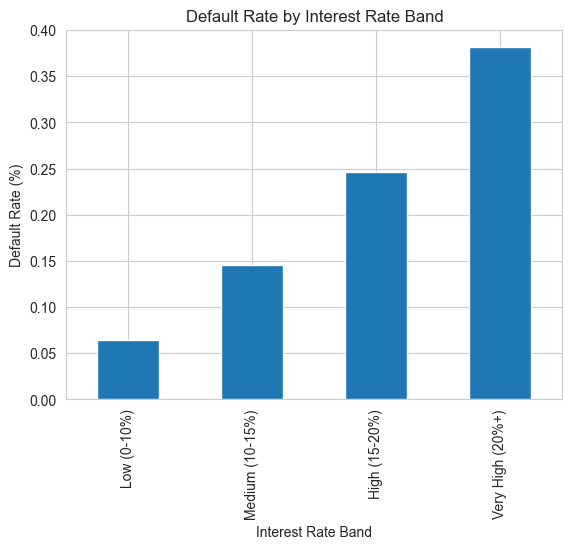

In [141]:
# Plot default rate by interest rate bins
dset_final.groupby('int_rate_bin')['is_default'].mean().plot(kind='bar')
plt.title('Default Rate by Interest Rate Band')
plt.ylabel('Default Rate (%)')
plt.xlabel('Interest Rate Band')
plt.show()

### INSIGHT: Interest Rate vs Default Rate (Bivariate Analysis)
**OBSERVATION FROM BOX PLOT:**
- Charged Off loans: Median interest rate ~13.5%
- Fully Paid loans: Median interest rate ~11.5%
- Defaulters have higher interest rates overall

**OBSERVATION FROM BAR PLOT:**
- Low (0-10%): ~6% default rate
- Medium (10-15%): ~14.5% default rate
- High (15-20%): ~24.5% default rate
- Very High (20%+): ~38% default rate (6x higher than low!)

**KEY FINDING:**
- STRONG monotonic relationship: Higher interest rate = Higher default
- Interest rate is one of the STRONGEST predictors of default
- Each rate band roughly doubles the default probability

**WHY THIS HAPPENS:**
- High rates are charged to already risky borrowers
- High rates make monthly payments harder to manage
- Creates a debt trap leading to default

**BUSINESS RECOMMENDATION:**
- Interest rate is a CRITICAL risk indicator
- Loans with 20%+ rates need extra scrutiny or collateral
- Consider setting an interest rate cap for high-risk segments

============================================================================


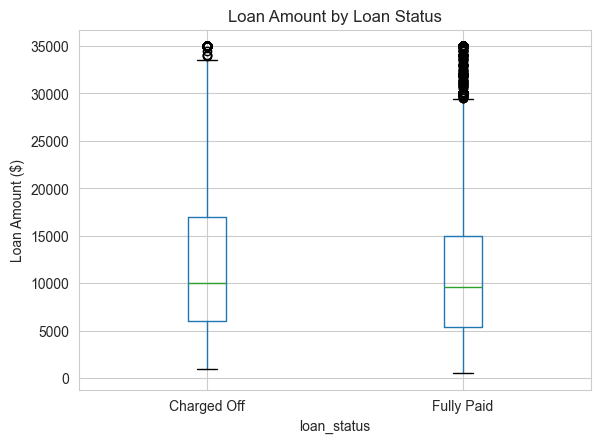

In [142]:
# Box plot of loan amount by loan status
dset_final.boxplot(column='loan_amnt', by='loan_status')
plt.title('Loan Amount by Loan Status')
plt.suptitle('')
plt.ylabel('Loan Amount ($)')
plt.show()

In [143]:
# Create loan amount bins
dset_final['loan_amnt_bin'] = pd.cut(dset_final['loan_amnt'], bins=[0, 5000, 10000, 20000, 40000], labels=['Small (0-5K)', 'Medium (5-10K)', 'Large (10-20K)', 'Very Large (20K+)'])

# Calculate default rate per bin
dset_final.groupby('loan_amnt_bin')['is_default'].mean() * 100

loan_amnt_bin
Small (0-5K)         13.433828
Medium (5-10K)       12.598489
Large (10-20K)       14.864294
Very Large (20K+)    20.118765
Name: is_default, dtype: float64

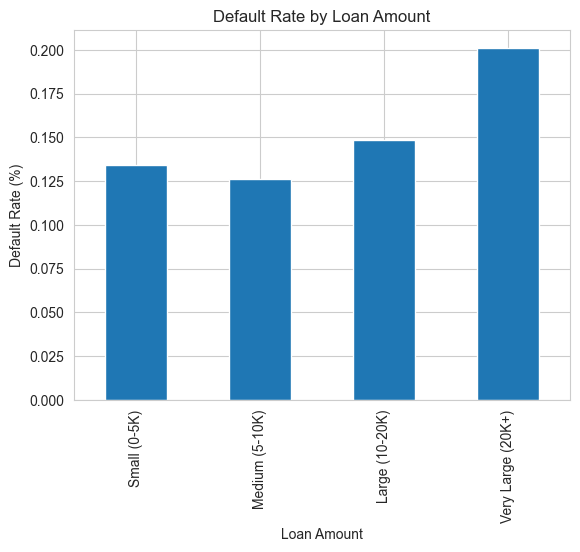

In [144]:
# Plot default rate by loan amount bins
dset_final.groupby('loan_amnt_bin')['is_default'].mean().plot(kind='bar')
plt.title('Default Rate by Loan Amount')
plt.ylabel('Default Rate (%)')
plt.xlabel('Loan Amount')
plt.show()

### INSIGHT: Loan Amount vs Default Rate (Bivariate Analysis)
**OBSERVATION FROM BOX PLOT:**
- Charged Off loans: Median ~10K
- Fully Paid loans: Median ~9.5K
- Defaulters have slightly higher loan amounts

**OBSERVATION FROM BAR PLOT:**
- Small (0-5K): ~13.5% default rate
- Medium (5-10K): ~12.5% default rate (LOWEST)
- Large (10-20K): ~15% default rate
- Very Large (20K+): ~20% default rate

**KEY FINDING:**
- Moderate relationship: Larger loans = Higher default risk
- Medium loans (5-10K) are the SAFEST
- Very Large loans (20K+) have 60% higher default than medium loans

**WHY THIS HAPPENS:**
- Larger loans = higher monthly payments = harder to manage
- Small loans might be for emergencies (risky)
- Medium loans are balanced and manageable

**BUSINESS RECOMMENDATION:**
- Loans above 20K need additional income verification
- Medium loan amounts (5-10K) are the sweet spot
- Consider stricter DTI requirements for large loans

============================================================================


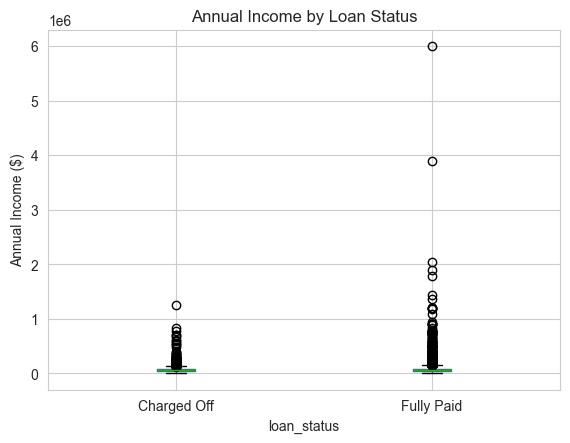

In [145]:
# Box plot of annual income by loan status
dset_final.boxplot(column='annual_inc', by='loan_status')
plt.title('Annual Income by Loan Status')
plt.suptitle('')
plt.ylabel('Annual Income ($)')
plt.show()

In [146]:
# Create annual income bins
dset_final['income_bin'] = pd.cut(dset_final['annual_inc'], bins=[0, 30000, 50000, 75000, 100000, 1000000], labels=['Low (0-30K)', 'Lower-Mid (30-50K)', 'Mid (50-75K)', 'Upper-Mid (75-100K)', 'High (100K+)'])

# Calculate default rate per bin
dset_final.groupby('income_bin')['is_default'].mean() * 100

income_bin
Low (0-30K)            17.900048
Lower-Mid (30-50K)     16.025580
Mid (50-75K)           14.376746
Upper-Mid (75-100K)    12.123242
High (100K+)           10.856721
Name: is_default, dtype: float64

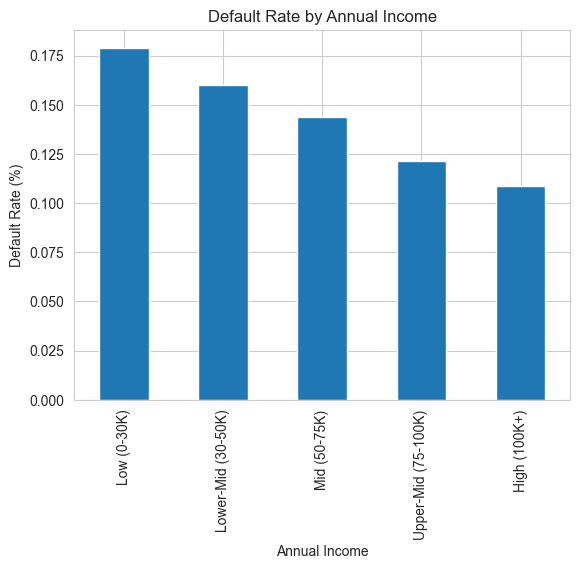

In [147]:
# Plot default rate by income bins
dset_final.groupby('income_bin')['is_default'].mean().plot(kind='bar')
plt.title('Default Rate by Annual Income')
plt.ylabel('Default Rate (%)')
plt.xlabel('Annual Income')
plt.show()

### INSIGHT: Annual Income vs Default Rate (Bivariate Analysis)
NOTE: Box plot is not interpretable due to extreme outliers (up to 6M)
Bar chart with bins provides clearer insight

**OBSERVATION FROM BAR PLOT:**
- Low (0-30K): ~18% default rate (HIGHEST)
- Lower-Mid (30-50K): ~16%
- Mid (50-75K): ~14.5%
- Upper-Mid (75-100K): ~12%
- High (100K+): ~11% (LOWEST)

**KEY FINDING:**
- STRONG inverse relationship: Higher income = Lower default
- Clear monotonic decrease from 18% to 11%
- Low income borrowers are 64% more likely to default than high income

**WHY THIS HAPPENS:**
- Higher income = more financial buffer
- Low income borrowers struggle with unexpected expenses
- Ability to pay directly impacts repayment

**BUSINESS RECOMMENDATION:**
- Income is a STRONG risk predictor
- Apply stricter criteria for loans to <30K income group
- Consider income-based loan limits

============================================================================


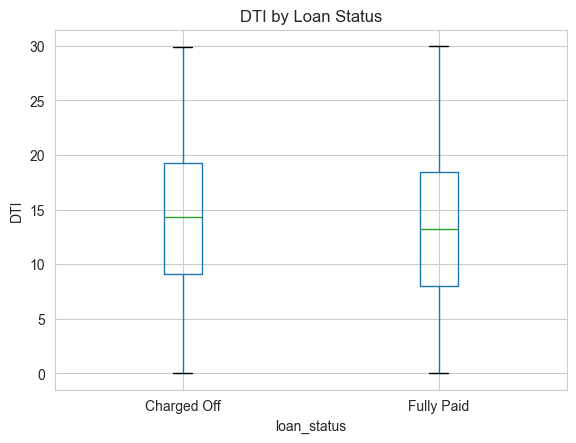

In [148]:
# Box plot of DTI by loan status
dset_final.boxplot(column='dti', by='loan_status')
plt.title('DTI by Loan Status')
plt.suptitle('')
plt.ylabel('DTI')
plt.show()

In [149]:
# Create DTI bins
dset_final['dti_bin'] = pd.cut(dset_final['dti'], bins=[0, 10, 20, 30, 50], labels=['Low (0-10)', 'Medium (10-20)', 'High (20-30)', 'Very High (30+)'])

# Calculate default rate per bin
dset_final.groupby('dti_bin')['is_default'].mean() * 100

dti_bin
Low (0-10)        12.425174
Medium (10-20)    14.899060
High (20-30)      16.344916
Name: is_default, dtype: float64

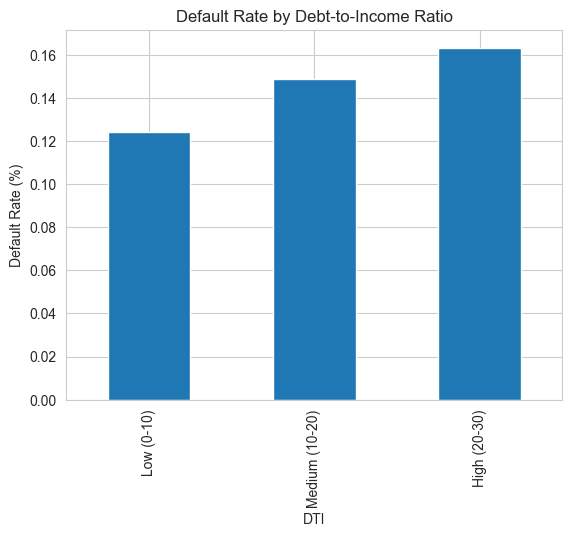

In [150]:
# Plot default rate by DTI bins
dset_final.groupby('dti_bin')['is_default'].mean().plot(kind='bar')
plt.title('Default Rate by Debt-to-Income Ratio')
plt.ylabel('Default Rate (%)')
plt.xlabel('DTI')
plt.show()

### INSIGHT: DTI (Debt-to-Income) vs Default Rate (Bivariate Analysis)
**OBSERVATION FROM BAR PLOT (Binned Default Rates):**
- Low (0-10): ~12.5% default rate (LOWEST)
- Medium (10-20): ~15%
- High (20-30): ~16.5% (HIGHEST)

**OBSERVATION FROM BOX PLOT:**
- Charged Off: Median DTI ~14.5, IQR roughly 9-19.5
- Fully Paid: Median DTI ~13, IQR roughly 8-18.5
- Defaulters have a higher median DTI and slightly wider spread
- No extreme outliers - DTI is a clean variable

**KEY FINDING:**
- Clear upward trend: Higher DTI = Higher default risk
- High DTI borrowers are 32% more likely to default than low DTI
- Box plot confirms defaulters carry higher debt relative to income
- DTI is a meaningful but moderate risk indicator

**WHY THIS HAPPENS:**
- High DTI = borrower already stretched with debt payments
- Less financial buffer for new loan payments
- Higher leverage = higher risk

**BUSINESS RECOMMENDATION:**
- Use DTI as a key factor in loan approval
- Set DTI limits (e.g., reject if DTI > 25)
- Combine DTI with income for better risk assessment

============================================================================


In [151]:
# Create revol_util bins
dset_final['revol_util_bin'] = pd.cut(dset_final['revol_util'], bins=[0, 20, 40, 60, 80, 150], labels=['Very Low (0-20%)', 'Low (20-40%)', 'Medium (40-60%)', 'High (60-80%)', 'Very High (80%+)'])

# Calculate default rate per bin
dset_final.groupby('revol_util_bin')['is_default'].mean() * 100

revol_util_bin
Very Low (0-20%)     9.093679
Low (20-40%)        11.635683
Medium (40-60%)     14.451361
High (60-80%)       16.704952
Very High (80%+)    19.806392
Name: is_default, dtype: float64

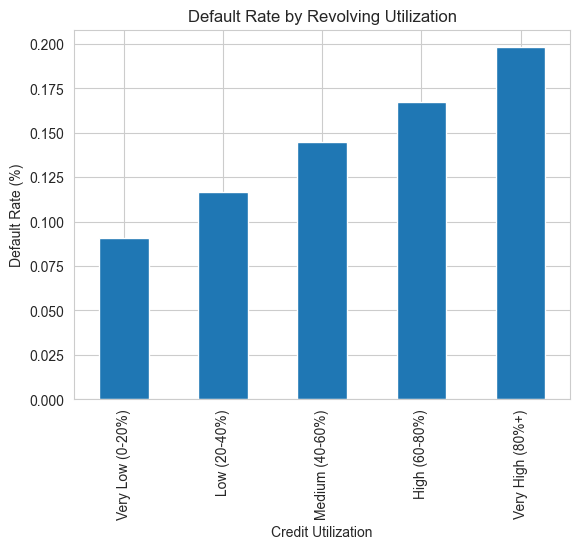

In [152]:
# Plot default rate by revol_util bins
dset_final.groupby('revol_util_bin')['is_default'].mean().plot(kind='bar')
plt.title('Default Rate by Revolving Utilization')
plt.ylabel('Default Rate (%)')
plt.xlabel('Credit Utilization')
plt.show()

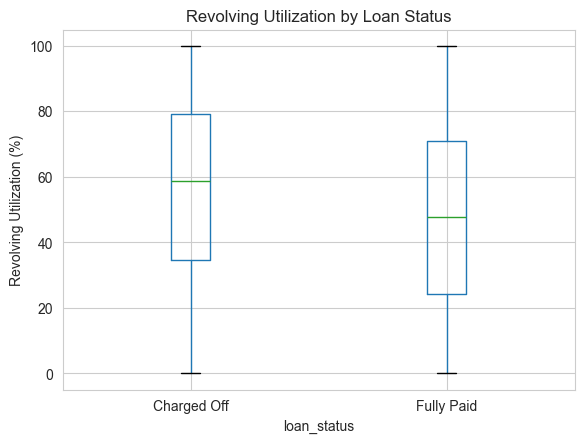

In [153]:
# Box plot of revolving utilization by loan status
dset_final.boxplot(column='revol_util', by='loan_status')
plt.title('Revolving Utilization by Loan Status')
plt.suptitle('')
plt.ylabel('Revolving Utilization (%)')
plt.show()

### INSIGHT: Revolving Utilization vs Default Rate (Bivariate Analysis)
**OBSERVATION FROM BAR PLOT (Binned Default Rates):**
- Very Low (0-20%): ~9% default rate (LOWEST)
- Low (20-40%): ~12%
- Medium (40-60%): ~14.5%
- High (60-80%): ~17%
- Very High (80%+): ~20% (HIGHEST)

**OBSERVATION FROM BOX PLOT:**
- Charged Off: Median utilization ~59%, IQR roughly 35-79%
- Fully Paid: Median utilization ~48%, IQR roughly 25-71%
- Defaulters are clearly using MORE of their available credit

**KEY FINDING:**
- STRONG monotonic relationship: Higher utilization = Higher default
- Default rate MORE THAN DOUBLES from Very Low (9%) to Very High (20%)
- Box plot shows clear separation - defaulters have ~11% higher median
- This is one of the STRONGEST predictors alongside int_rate and grade

**WHY THIS HAPPENS:**
- High credit utilization = borrower is already maxing out credit
- Less financial breathing room for emergencies
- Signals financial distress even before the loan

**BUSINESS RECOMMENDATION:**
- revol_util is a STRONG risk indicator - must include in risk models
- Borrowers with 80%+ utilization need extra scrutiny
- Consider reducing loan amounts for high utilization borrowers

============================================================================


In [154]:
# Calculate default rate per number of bankruptcies
dset_final.groupby('pub_rec_bankruptcies')['is_default'].mean() * 100

pub_rec_bankruptcies
0.0    14.033868
1.0    21.909745
2.0    40.000000
Name: is_default, dtype: float64

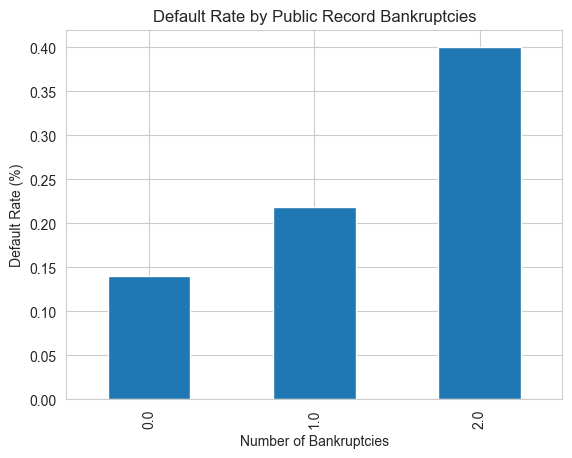

In [155]:
# Plot default rate by bankruptcies
dset_final.groupby('pub_rec_bankruptcies')['is_default'].mean().plot(kind='bar')
plt.title('Default Rate by Public Record Bankruptcies')
plt.ylabel('Default Rate (%)')
plt.xlabel('Number of Bankruptcies')
plt.show()

### INSIGHT: Public Record Bankruptcies vs Default Rate (Bivariate Analysis)
**OBSERVATION:**
- 0 Bankruptcies: ~14% default rate
- 1 Bankruptcy: ~22% default rate
- 2 Bankruptcies: ~40% default rate

**KEY FINDING:**
- VERY STRONG predictor: Default rate nearly TRIPLES from 0 to 2 bankruptcies
- Even 1 bankruptcy increases default risk by ~57% (14% → 22%)
- 2 bankruptcies = almost 3x the risk of 0 bankruptcies
- Past financial failure is a STRONG signal of future default

**WHY THIS HAPPENS:**
- Borrowers who declared bankruptcy once have poor financial habits
- Multiple bankruptcies indicate chronic financial mismanagement
- Credit recovery after bankruptcy is difficult

**BUSINESS RECOMMENDATION:**
- pub_rec_bankruptcies is a TOP RISK INDICATOR
- Borrowers with 1+ bankruptcy need stricter approval criteria
- Borrowers with 2+ bankruptcies should be flagged as high risk
- Combine with income and DTI for stronger risk assessment

============================================================================


In [156]:
# Select numerical columns
num_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 
            'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 
            'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'is_default']

# Correlation matrix
dset_final[num_cols].corr()

loan_amnt  int_rate  installment  annual_inc       dti  \
loan_amnt              1.000000  0.300695     0.931612    0.266200  0.060831   
int_rate               0.300695  1.000000     0.276109    0.046628  0.112984   
installment            0.931612  0.276109     1.000000    0.264609  0.050163   
annual_inc             0.266200  0.046628     0.264609    1.000000 -0.123731   
dti                    0.060831  0.112984     0.050163   -0.123731  1.000000   
delinq_2yrs           -0.033787  0.158350    -0.021706    0.021093 -0.034535   
inq_last_6mths         0.013045  0.132678     0.011281    0.036057  0.000272   
open_acc               0.173130  0.009083     0.169022    0.154382  0.288918   
pub_rec               -0.046497  0.099270    -0.042266   -0.014447 -0.004876   
revol_bal              0.312908  0.096195     0.308718    0.276591  0.227385   
revol_util             0.062201  0.466023     0.091810    0.014676  0.279130   
total_acc              0.254629 -0.044048     0.228357    0.233324  0.229579   
pub_rec_bankruptcies  -0.031041  0.084148    -0.029156   -0.012180  0.007803   
is_default             0.063250  0.213071     0.030366   -0.038125  0.042912   

                      delinq_2yrs  inq_last_6mths  open_acc   pub_rec  \
loan_amnt               -0.033787        0.013045  0.173130 -0.046497   
int_rate                 0.158350        0.132678  0.009083  0.099270   
installment             -0.021706        0.011281  0.169022 -0.042266   
annual_inc               0.021093        0.036057  0.154382 -0.014447   
dti                     -0.034535        0.000272  0.288918 -0.004876   
delinq_2yrs              1.000000        0.008317  0.010371  0.010285   
inq_last_6mths           0.008317        1.000000  0.093975  0.023462   
open_acc                 0.010371        0.093975  1.000000  0.002661   
pub_rec                  0.010285        0.023462  0.002661  1.000000   
revol_bal               -0.055086       -0.021232  0.286457 -0.058638   
revol_util              -0.042610       -0.070186 -0.088038  0.058151   
total_acc                0.066033        0.114215  0.686045 -0.019652   
pub_rec_bankruptcies     0.005336        0.013556  0.008924  0.837156   
is_default               0.018831        0.070787 -0.005454  0.050130   

                      revol_bal  revol_util  total_acc  pub_rec_bankruptcies  \
loan_amnt              0.312908    0.062201   0.254629             -0.031041   
int_rate               0.096195    0.466023  -0.044048              0.084148   
installment            0.308718    0.091810   0.228357             -0.029156   
annual_inc             0.276591    0.014676   0.233324             -0.012180   
dti                    0.227385    0.279130   0.229579              0.007803   
delinq_2yrs           -0.055086   -0.042610   0.066033              0.005336   
inq_last_6mths        -0.021232   -0.070186   0.114215              0.013556   
open_acc               0.286457   -0.088038   0.686045              0.008924   
pub_rec               -0.058638    0.058151  -0.019652              0.837156   
revol_bal              1.000000    0.302893   0.312675             -0.046002   
revol_util             0.302893    1.000000  -0.068009              0.059834   
total_acc              0.312675   -0.068009   1.000000             -0.005668   
pub_rec_bankruptcies  -0.046002    0.059834  -0.005668              1.000000   
is_default             0.007252    0.099528  -0.020236              0.045091   

                      is_default  
loan_amnt               0.063250  
int_rate                0.213071  
installment             0.030366  
annual_inc             -0.038125  
dti                     0.042912  
delinq_2yrs             0.018831  
inq_last_6mths          0.070787  
open_acc               -0.005454  
pub_rec                 0.050130  
revol_bal               0.007252  
revol_util              0.099528  
total_acc              -0.020236  
pub_rec_bankruptcies    0.045091  
is_default              1.000000

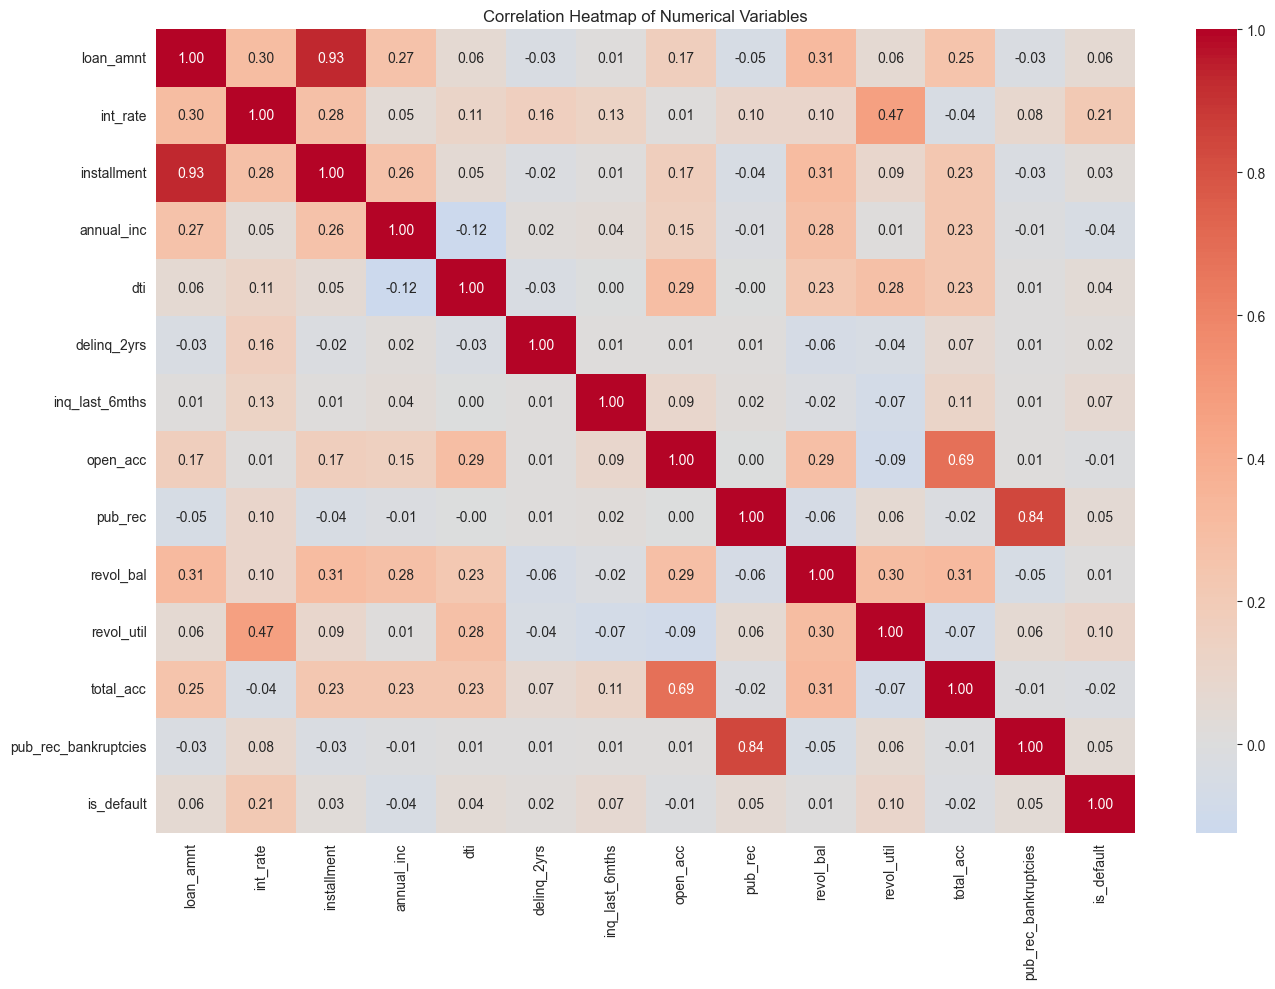

In [157]:
# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(dset_final[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

### INSIGHT: Correlation Heatmap (Bivariate Analysis - Final Step)
STRONGEST CORRELATIONS WITH is_default (Target):
- int_rate: 0.21 (HIGHEST - confirms interest rate is top predictor)
- revol_util: 0.10 (Higher utilization = higher default)
- pub_rec_bankruptcies: 0.05
- loan_amnt: 0.06
- dti: 0.04
- annual_inc: -0.04 (Negative - higher income = lower default)

MULTI-COLLINEARITY (Redundant Variables):
- loan_amnt & installment: 0.93 (VERY HIGH - drop one of them)
- open_acc & total_acc: 0.69 (HIGH - related credit accounts)
- pub_rec & pub_rec_bankruptcies: 0.84 (VERY HIGH - drop one)

OTHER NOTABLE CORRELATIONS:
- int_rate & revol_util: 0.47 (High utilization → higher rates)
- loan_amnt & revol_bal: 0.31 (Bigger loans → more revolving debt)
- loan_amnt & annual_inc: 0.27 (Higher income → larger loans)

**KEY FINDING:**
- int_rate is the STRONGEST single predictor of default (0.21)
- installment can be DROPPED (0.93 with loan_amnt - redundant)
- pub_rec can be DROPPED (0.84 with pub_rec_bankruptcies - redundant)

**BUSINESS RECOMMENDATION:**
- Top risk factors: int_rate, revol_util, pub_rec_bankruptcies
- Remove redundant columns before modeling: installment, pub_rec
- Income and DTI should be used together (weak individually)

============================================================================


## 7. Multivariate Analysis

In this section, we examine how **combinations of features** together affect default risk. 
While bivariate analysis showed individual feature effects, multivariate analysis reveals 
interaction effects and helps identify high-risk borrower profiles.

**Techniques used:**
- Correlation heatmap to identify linear relationships between numerical features
- Grouped bar charts showing default rates by two categorical variables simultaneously
- Pivot table heatmaps showing default rates across two dimensions

**Goal:** Identify compound risk factors (e.g., Grade G + High Interest Rate = extreme risk).


In [158]:
# Default rate by grade and interest rate band
dset_final.groupby(['grade', 'int_rate_bin'])['is_default'].mean() * 100

grade  int_rate_bin    
A      Low (0-10%)          5.776398
B      Low (0-10%)          9.473198
       Medium (10-15%)     12.508157
C      Low (0-10%)          0.000000
       Medium (10-15%)     16.319933
       High (15-20%)       23.005566
D      Low (0-10%)          0.000000
       Medium (10-15%)     18.200000
       High (15-20%)       23.388263
E      Low (0-10%)          0.000000
       Medium (10-15%)     24.074074
       High (15-20%)       26.305140
       Very High (20%+)    40.243902
F      High (15-20%)       26.229508
       Very High (20%+)    40.987654
G      High (15-20%)       32.000000
       Very High (20%+)    33.210332
Name: is_default, dtype: float64

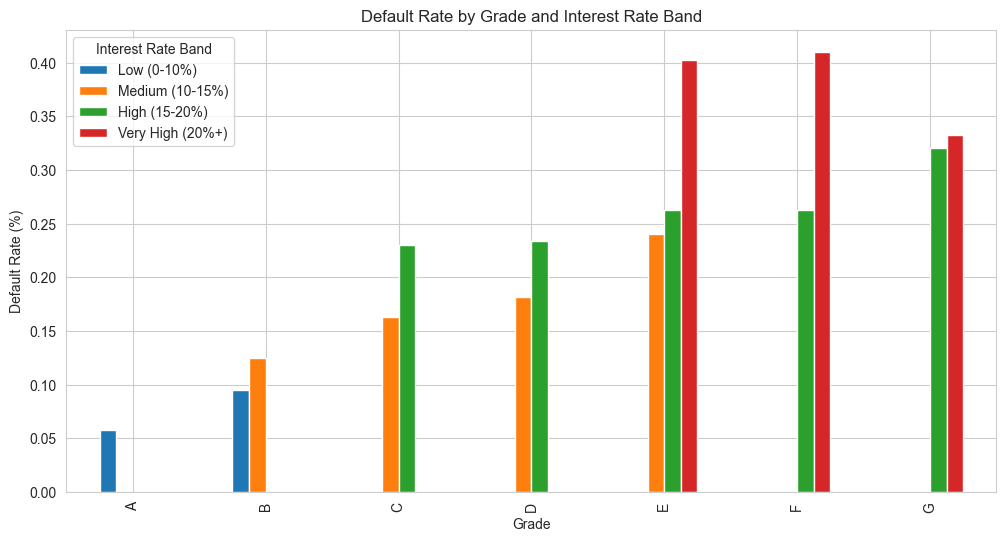

In [159]:
# Grouped analysis
dset_final.groupby(['grade', 'int_rate_bin'])['is_default'].mean().unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Default Rate by Grade and Interest Rate Band')
plt.ylabel('Default Rate (%)')
plt.xlabel('Grade')
plt.legend(title='Interest Rate Band')
plt.show()

### INSIGHT: Grade + Interest Rate Band vs Default Rate (Multivariate)
**OBSERVATION:**
- Grade A: Only has Low rates (0-10%) → ~5.5% default
- Grade B: Low (~9.5%) and Medium (~12.5%)
- Grade C: Medium (~16%) and High (~23%)
- Grade D: Medium (~18%) and High (~23.5%)
- Grade E: Medium (~24%), High (~26%), Very High starts appearing
- Grade F: High (~26%) and Very High (~41%) - HIGHEST DEFAULT RATE
- Grade G: High (~32%) and Very High (~33%)

**KEY FINDING:**
- Within the SAME grade, higher interest rates = higher defaults
- Grade F + Very High rate = 41% default - MOST DANGEROUS combo
- Grade and Interest Rate TOGETHER amplify the risk
- Not all Grade E/F loans are equal - rate matters within grade

**BUSINESS RECOMMENDATION:**
- Grade F/G + Very High interest rate = REJECT or require collateral
- Even within safe grades (B/C), higher rates push defaults up
- Use BOTH grade AND interest rate for risk scoring, not just one

============================================================================


In [160]:
# Default rate by grade and term
dset_final.groupby(['grade', 'term'])['is_default'].mean() * 100

grade  term
A      36       5.635776
       60       9.210526
B      36      10.269675
       60      18.565772
C      36      14.273002
       60      23.699706
D      36      17.786937
       60      28.800442
E      36      19.858156
       60      29.948951
F      36      26.108374
       60      34.221039
G      36      37.500000
       60      32.083333
Name: is_default, dtype: float64

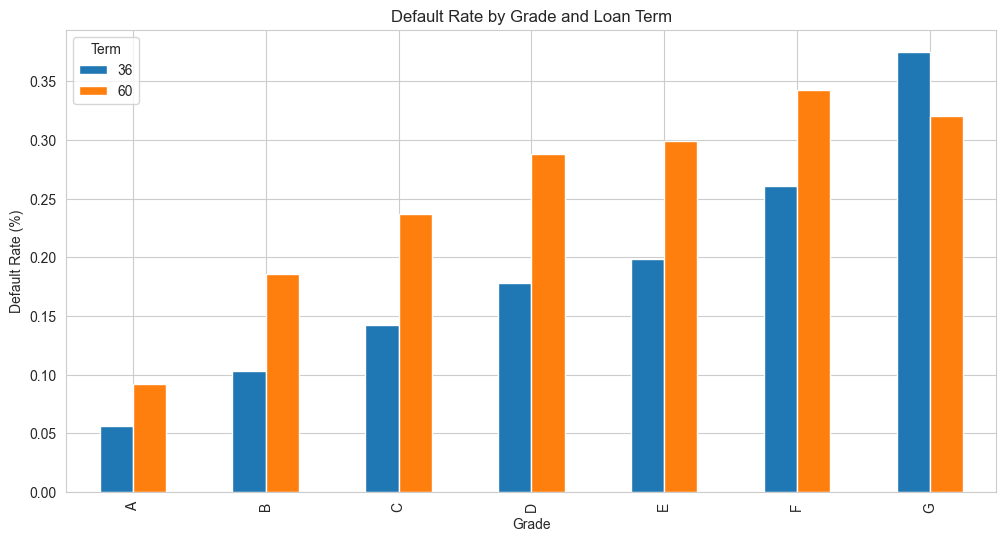

In [161]:
# Grouped analysis
dset_final.groupby(['grade', 'term'])['is_default'].mean().unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Default Rate by Grade and Loan Term')
plt.ylabel('Default Rate (%)')
plt.xlabel('Grade')
plt.legend(title='Term')
plt.show()

### INSIGHT: Grade + Term vs Default Rate (Multivariate)
**OBSERVATION:**
- Grade A: 36-month ~5.5% vs 60-month ~9%
- Grade B: 36-month ~10% vs 60-month ~18.5%
- Grade C: 36-month ~14% vs 60-month ~24%
- Grade D: 36-month ~18% vs 60-month ~29%
- Grade E: 36-month ~20% vs 60-month ~30%
- Grade F: 36-month ~26% vs 60-month ~34.5%
- Grade G: 36-month ~37% vs 60-month ~32% (EXCEPTION!)

**KEY FINDING:**
- 60-month loans are riskier across ALL grades EXCEPT Grade G
- The gap is MASSIVE: 60-month loans have ~60-80% higher default rates
- Grade G reverses the trend - possibly due to small sample size
- WORST COMBO: Grade F + 60-month = ~34.5% default rate

**WHY THIS HAPPENS:**
- Longer term = more time for financial trouble
- Borrowers pay more interest over 60 months
- Longer commitment increases uncertainty

**BUSINESS RECOMMENDATION:**
- 60-month loans should have stricter approval criteria
- Consider limiting 60-month option for Grade D and below
- Grade C/D + 60 months nearly doubles default risk vs 36 months

============================================================================


In [162]:
# Pivot table: Default rate by purpose and grade
pivot = dset_final.pivot_table(values='is_default', index='purpose', columns='grade', aggfunc='mean') * 100
pivot.round(2)

grade                   A      B      C      D      E      F       G
purpose                                                             
car                  5.04  11.95  14.66  20.49  12.96  44.44   50.00
credit_card          4.15   8.60  13.26  16.87  23.74  23.91   10.71
debt_consolidation   6.17  11.47  16.39  21.52  27.07  35.47   33.54
educational          5.06  18.37  14.61  33.33  46.15  25.00    0.00
home_improvement     4.20  11.34  17.64  19.57  21.08  25.45   13.33
house                3.33  10.10  19.70  24.00  40.00  50.00   40.00
major_purchase       4.16   8.90  14.75  22.48  19.35  15.38   25.00
medical              5.61  14.36  22.31  24.36  17.95  30.77   66.67
moving               9.15  18.39  14.81  19.35  25.00  11.11   20.00
other                7.47  13.52  19.33  25.76  31.50  26.03   41.18
renewable_energy    17.24  16.13  33.33   0.00   0.00  33.33  100.00
small_business      11.41  25.90  28.53  33.33  35.14  39.77   44.68
vacation             9.84  17.09  13.79  10.71  36.84   0.00    0.00
wedding              2.51   8.99  13.47  14.84  20.00  21.05   40.00

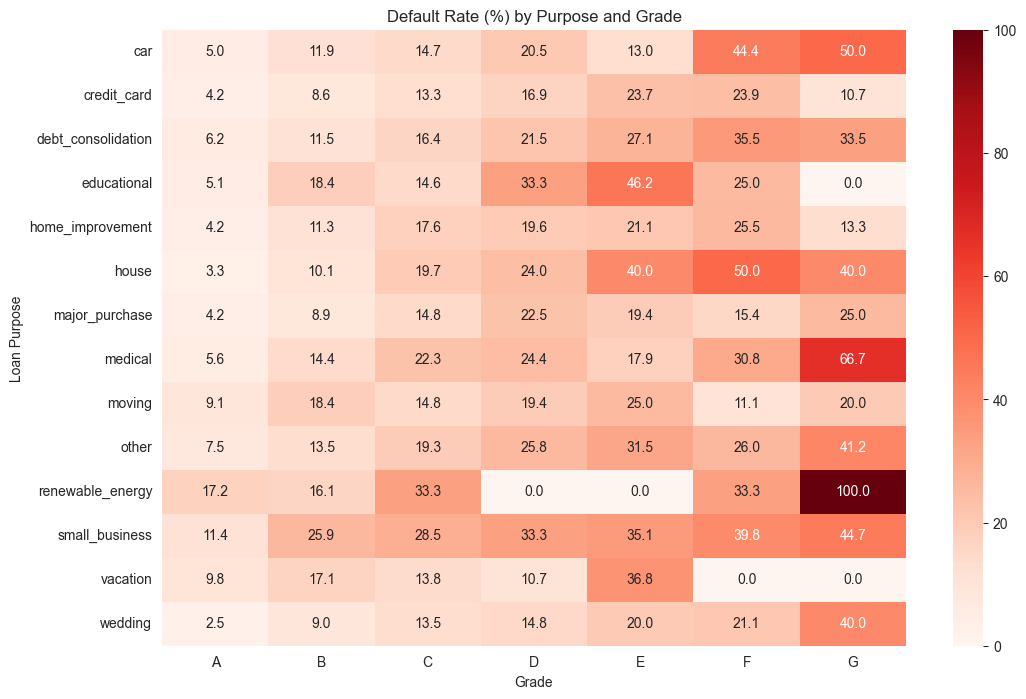

In [163]:
# Heatmap of default rate by purpose and grade
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='Reds')
plt.title('Default Rate (%) by Purpose and Grade')
plt.ylabel('Loan Purpose')
plt.xlabel('Grade')
plt.show()

### INSIGHT: Purpose + Grade vs Default Rate (Multivariate)
TOP 5 RISKIEST COMBINATIONS (Danger Zones):
1. Renewable Energy + Grade G: 100% default (small sample but alarming)
2. Medical + Grade G: 66.7% default
3. House + Grade F: 50% default
4. Car + Grade G: 50% default
5. Educational + Grade E: 46.2% default

SAFEST COMBINATIONS:
1. Wedding + Grade A: 2.5% default
2. House + Grade A: 3.3% default
3. Credit Card + Grade A: 4.2% default
4. Home Improvement + Grade A: 4.2% default

**KEY FINDING:**
- Small Business is risky across ALL grades (11% to 45%)
- Grade A keeps default below 10% for ALL purposes
- Grade F/G pushes default above 25% for MOST purposes
- Some combos like Renewable Energy + Grade G hit 100% (all defaulted)
- NOTE: Extreme values (100%, 0%) may be due to very small sample sizes

**BUSINESS RECOMMENDATION:**
- Small Business + Grade D/E/F/G = REJECT or very high collateral
- Medical + Grade F/G = HIGH RISK - needs income verification
- Grade A borrowers are safe regardless of purpose
- Consider purpose


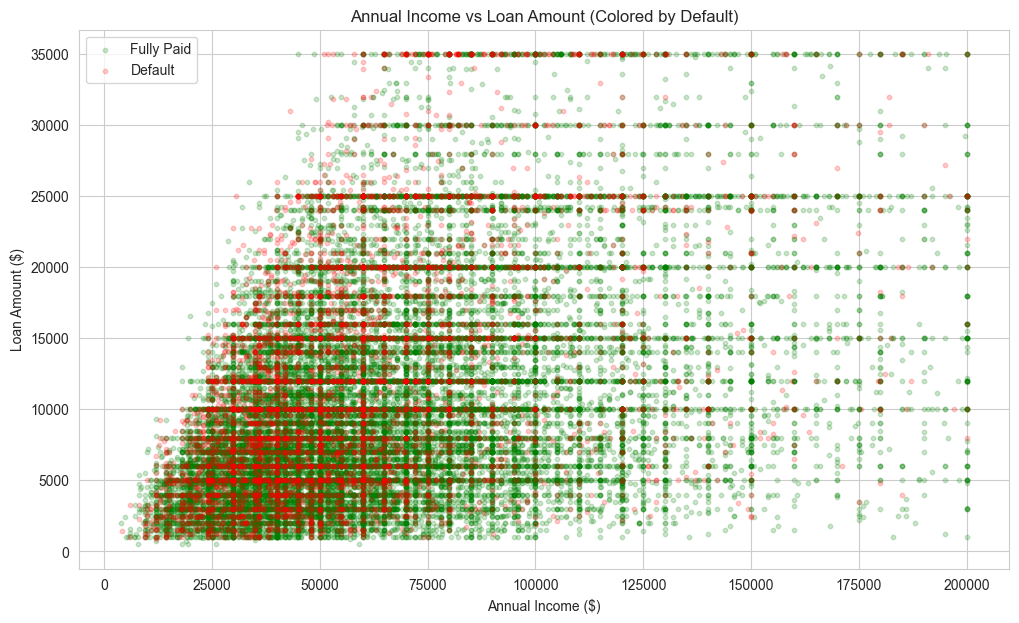

In [164]:
# Filter income below 200K for better visibility (removes extreme outliers)
temp = dset_final[dset_final['annual_inc'] <= 200000]

# Scatter plot
plt.figure(figsize=(12, 7))
plt.scatter(temp[temp['is_default']==0]['annual_inc'], temp[temp['is_default']==0]['loan_amnt'], alpha=0.2, label='Fully Paid', color='green', s=10)
plt.scatter(temp[temp['is_default']==1]['annual_inc'], temp[temp['is_default']==1]['loan_amnt'], alpha=0.2, label='Default', color='red', s=10)
plt.title('Annual Income vs Loan Amount (Colored by Default)')
plt.xlabel('Annual Income ($)')
plt.ylabel('Loan Amount ($)')
plt.legend()
plt.show()

In [165]:
# Grouped default rate
dset_final.groupby(['income_bin', 'loan_amnt_bin'])['is_default'].mean().unstack() * 100

loan_amnt_bin        Small (0-5K)  Medium (5-10K)  Large (10-20K)  \
income_bin                                                          
Low (0-30K)             16.523314       17.643312       26.719577   
Lower-Mid (30-50K)      14.494133       14.151177       18.541944   
Mid (50-75K)            12.162760       11.578679       15.653642   
Upper-Mid (75-100K)      8.274232        9.090909       12.050282   
High (100K+)             8.181818        9.158416        8.647562   

loan_amnt_bin        Very Large (20K+)  
income_bin                              
Low (0-30K)                  40.000000  
Lower-Mid (30-50K)           32.982456  
Mid (50-75K)                 23.847518  
Upper-Mid (75-100K)          19.733333  
High (100K+)                 15.615616

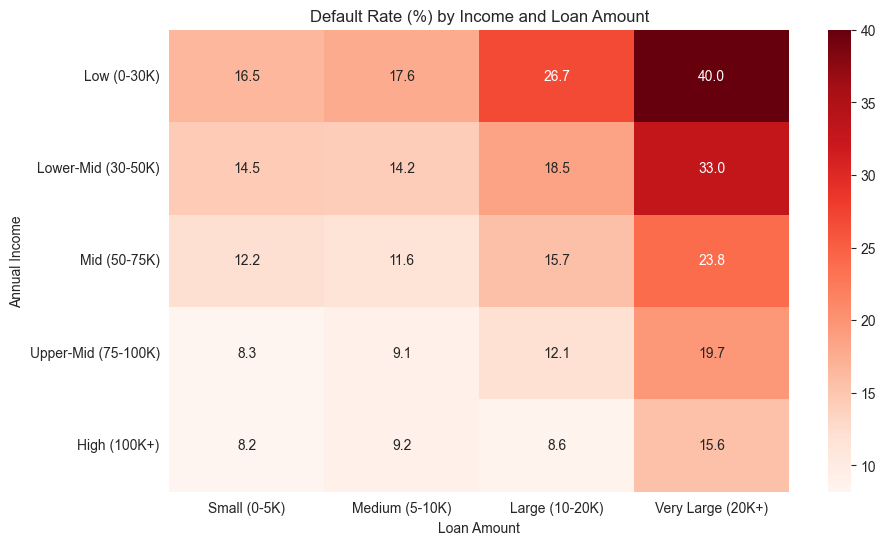

In [166]:
# Heatmap of default rate by income and loan amount
pivot2 = dset_final.groupby(['income_bin', 'loan_amnt_bin'])['is_default'].mean().unstack() * 100
plt.figure(figsize=(10, 6))
sns.heatmap(pivot2, annot=True, fmt='.1f', cmap='Reds')
plt.title('Default Rate (%) by Income and Loan Amount')
plt.ylabel('Annual Income')
plt.xlabel('Loan Amount')
plt.show()

### INSIGHT: Annual Income + Loan Amount vs Default Rate (Multivariate)
**OBSERVATION FROM SCATTER PLOT:**
- Red dots (defaults) are concentrated in LOW income + HIGH loan area
- Green dots (fully paid) dominate the HIGH income region
- Left-upper corner (low income, big loan) = danger zone

**OBSERVATION FROM HEATMAP (Key Numbers):**
MOST DANGEROUS COMBOS:
- Low Income (0-30K) + Very Large Loan (20K+) = 40% DEFAULT!
- Lower-Mid Income (30-50K) + Very Large Loan (20K+) = 33%
- Low Income (0-30K) + Large Loan (10-20K) = 26.7%
- Mid Income (50-75K) + Very Large Loan (20K+) = 23.8%

SAFEST COMBOS:
- High Income (100K+) + Small Loan (0-5K) = 8.2%
- Upper-Mid Income (75-100K) + Small Loan (0-5K) = 8.3%
- High Income (100K+) + Large Loan (10-20K) = 8.6%

**KEY FINDING:**
- DOUBLE RISK FACTOR: Low income + Large loan = DEADLY combination
- Default rate jumps from 8% to 40% (5x increase!)
- Even high income borrowers struggle with Very Large loans (15.6%)
- Income ALONE is not enough - must be evaluated relative to loan size

**BUSINESS RECOMMENDATION:**
- MUST set loan limits based on income (e.g., max loan = 3x annual income)
- Low income + Large loan requests should be REJECTED
- This is the MOST ACTIONABLE insight for risk management

============================================================================


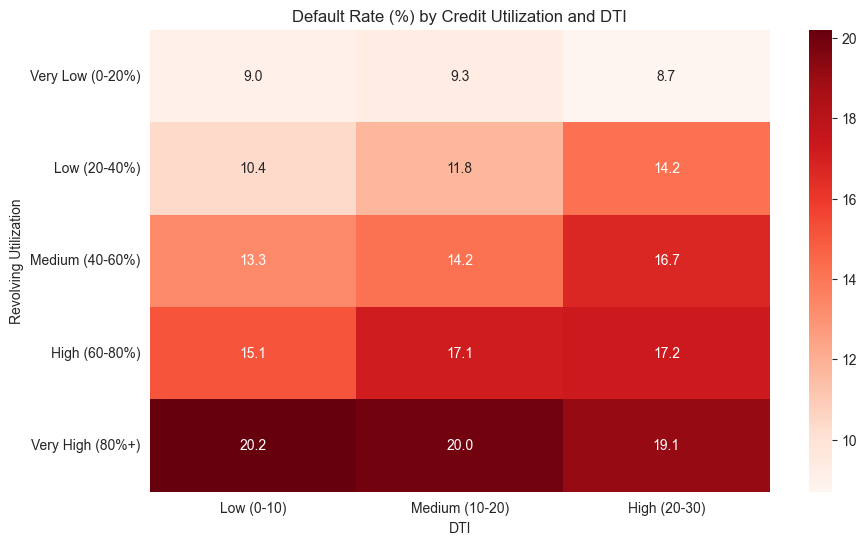

In [167]:
# Pivot table: Default rate by revol_util bins and DTI bins
pivot3 = dset_final.pivot_table(values='is_default', index='revol_util_bin', columns='dti_bin', aggfunc='mean') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(pivot3, annot=True, fmt='.1f', cmap='Reds')
plt.title('Default Rate (%) by Credit Utilization and DTI')
plt.ylabel('Revolving Utilization')
plt.xlabel('DTI')
plt.show()

### INSIGHT: Credit Utilization + DTI vs Default Rate (Multivariate)
**OBSERVATION:**
SAFEST ZONE (Top-Left):
- Very Low Utilization + Low DTI = 9.0% default (LOWEST)
- Very Low Utilization + High DTI = 8.7% (utilization matters more)

DANGER ZONE (Bottom):
- Very High Utilization + Low DTI = 20.2%
- Very High Utilization + Medium DTI = 20.0%
- Very High Utilization + High DTI = 19.1%

**KEY FINDING:**
- Revolving Utilization is the DOMINANT factor here
- DTI has less impact when utilization is already very high
- Very High utilization = ~20% default REGARDLESS of DTI level
- When utilization is low, DTI starts to matter more (10.4% → 14.2%)
- Combined effect: Default rate doubles from best (8.7%) to worst (20.2%)

INTERESTING PATTERN:
- At Very High utilization, DTI barely matters (20.2 vs 19.1)
- This means maxed-out credit cards are a stronger danger signal than DTI
- Borrowers maxing credit are already in financial distress

**BUSINESS RECOMMENDATION:**
- revol_util is MORE important than DTI for risk prediction
- Borrowers with 80%+ utilization are risky regardless of DTI
- For low utilization borrowers, use DTI as secondary filter
- Flag anyone with revol_util > 80% for manual review

============================================================================


## 8. Outlier Identification & Treatment

Extreme values in numerical columns can skew analysis and visualizations. In this section, 
we identify outliers using the **IQR (Interquartile Range) method** and decide on appropriate 
treatment for each column.

**Approach:** We cap extreme values at the 99th percentile rather than removing them, because 
these are real data points (e.g., high-income borrowers exist) - we just don't want them to 
distort our visualizations.


### Note on Outlier Treatment

The following section performs outlier detection and treatment. While outlier treatment is often done during data cleaning, performing it here allows us to assess the impact of extreme values *after* the primary analysis. We have chosen to cap extreme values (99th percentile) for Income and Revolving Balance to minimize skew without removing data points, while retaining other valid high-value records.

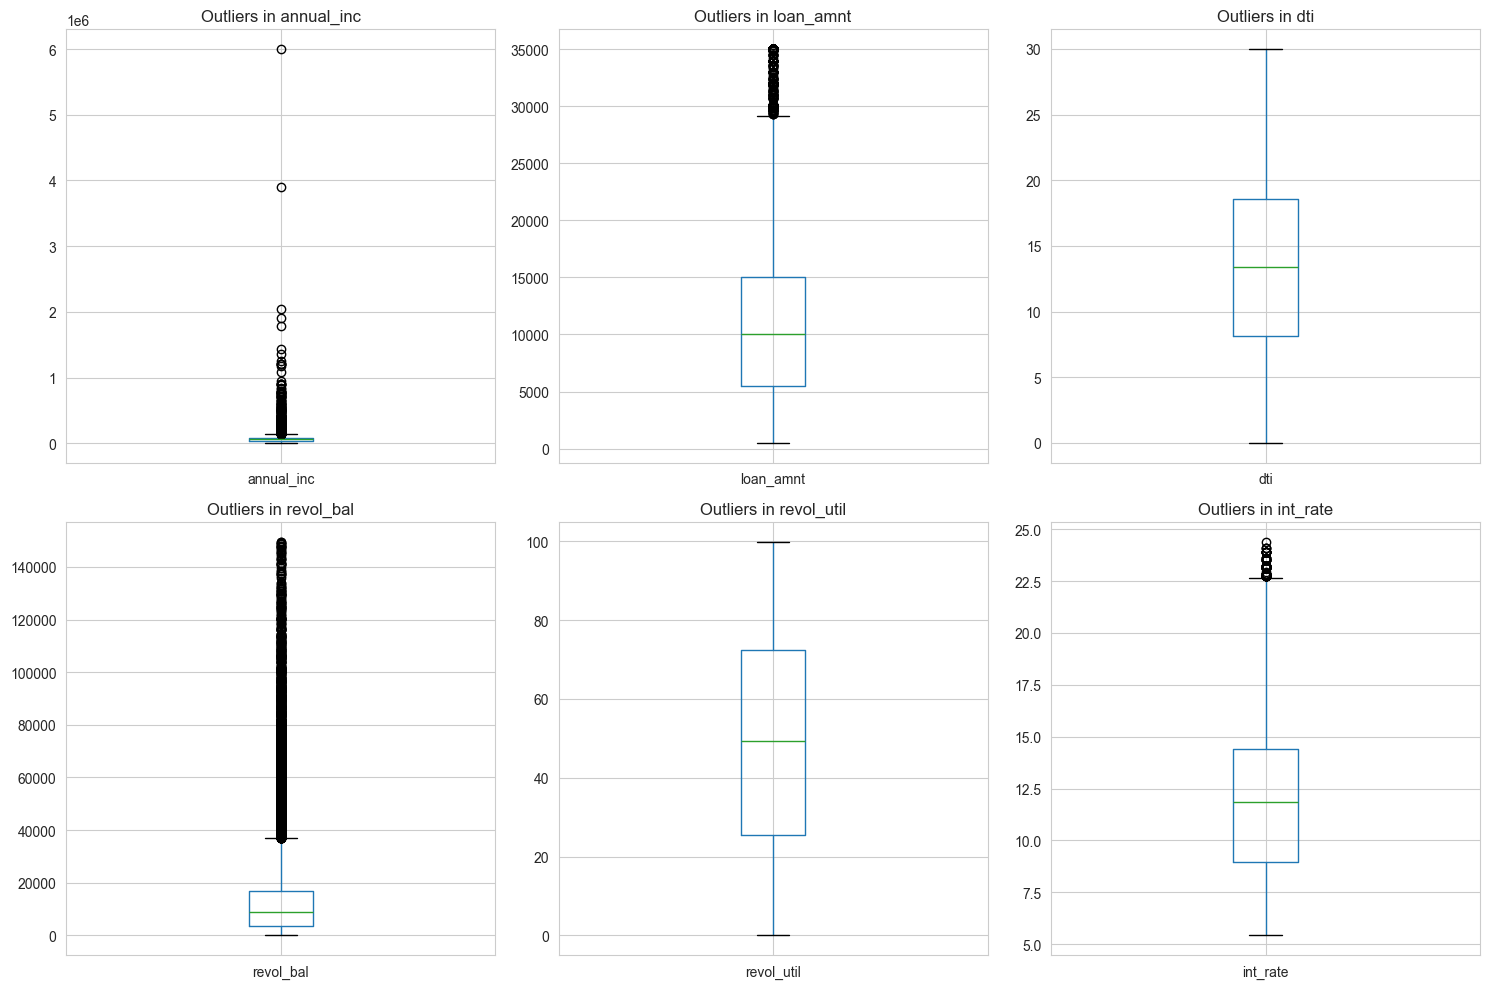

In [168]:
# Box plots for key numerical columns
cols_to_check = ['annual_inc', 'loan_amnt', 'dti', 'revol_bal', 'revol_util', 'int_rate']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(2, 3, i)
    dset_final.boxplot(column=col)
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()

In [169]:
# Count outliers using IQR method for each column
for col in cols_to_check:
    Q1 = dset_final[col].quantile(0.25)
    Q3 = dset_final[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = dset_final[(dset_final[col] < lower) | (dset_final[col] > upper)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(dset_final)*100:.1f}%) | Range: {lower:.1f} to {upper:.1f}")

annual_inc: 1729 outliers (4.6%) | Range: -22000.0 to 146000.0
loan_amnt: 1078 outliers (2.9%) | Range: -8750.0 to 29250.0
dti: 0 outliers (0.0%) | Range: -7.4 to 34.1
revol_bal: 2361 outliers (6.3%) | Range: -16248.0 to 36976.0
revol_util: 0 outliers (0.0%) | Range: -45.1 to 142.9
int_rate: 64 outliers (0.2%) | Range: 0.7 to 22.6


In [170]:
# ============================================================================
# OUTLIER TREATMENT DECISION
# ============================================================================

# | Column      | Outliers | Decision | Reason                              |
# |-------------|----------|----------|-------------------------------------|
# | annual_inc  | 4.6%     | CAP      | Incomes up to 6M are real but      |
# |             |          |          | distort analysis. Cap at 99th pctl  |
# | loan_amnt   | 2.9%     | KEEP     | These are valid large loans,        |
# |             |          |          | not errors. Max is $35K (reasonable) |
# | dti         | 0.0%     | KEEP     | No outliers detected                |
# | revol_bal   | 6.3%     | CAP      | Extreme balances distort visuals.   |
# |             |          |          | Cap at 99th percentile              |
# | revol_util  | 0.0%     | KEEP     | No outliers detected                |
# | int_rate    | 0.2%     | KEEP     | Only 64 records. These are valid    |
# |             |          |          | high-rate loans, not errors         |

In [171]:
# Cap annual_inc at 99th percentile
cap_inc = dset_final['annual_inc'].quantile(0.99)
dset_final['annual_inc'] = dset_final['annual_inc'].clip(upper=cap_inc)
print(f"Annual Income capped at: {cap_inc:.0f}")

# Cap revol_bal at 99th percentile
cap_revol = dset_final['revol_bal'].quantile(0.99)
dset_final['revol_bal'] = dset_final['revol_bal'].clip(upper=cap_revol)
print(f"Revolving Balance capped at: {cap_revol:.0f}")

print("Outlier capping done!")

Annual Income capped at: 235000
Revolving Balance capped at: 83319
Outlier capping done!


In [172]:
'''
□ PHASE 1: FIRST LOOK
  □ Load data
  □ Check shape, head, tail
  □ Check info() and describe()

□ PHASE 2: DATA QUALITY
  □ Check missing values
  □ Check duplicates
  □ Fix data types
  □ Remove useless columns

□ PHASE 3: UNIVARIATE
  □ Analyze target variable first
  □ Histograms for numerical
  □ Bar charts for categorical
  □ Note any skewness/outliers

□ PHASE 4: BIVARIATE
  □ Target vs key numerical columns
  □ Target vs key categorical columns
  □ Correlation heatmap
  □ Note strong relationships

□ PHASE 5: MULTIVARIATE (if needed)
  □ Pair plots
  □ Grouped analysis

□ PHASE 6: OUTLIERS
  □ Identify outliers
  □ Decide: remove/cap/keep

□ PHASE 7: DOCUMENT
  □ Write insights
  □ Create visualizations for presentation
  □ Business recommendations

  '''

'\n□ PHASE 1: FIRST LOOK\n  □ Load data\n  □ Check shape, head, tail\n  □ Check info() and describe()\n\n□ PHASE 2: DATA QUALITY\n  □ Check missing values\n  □ Check duplicates\n  □ Fix data types\n  □ Remove useless columns\n\n□ PHASE 3: UNIVARIATE\n  □ Analyze target variable first\n  □ Histograms for numerical\n  □ Bar charts for categorical\n  □ Note any skewness/outliers\n\n□ PHASE 4: BIVARIATE\n  □ Target vs key numerical columns\n  □ Target vs key categorical columns\n  □ Correlation heatmap\n  □ Note strong relationships\n\n□ PHASE 5: MULTIVARIATE (if needed)\n  □ Pair plots\n  □ Grouped analysis\n\n□ PHASE 6: OUTLIERS\n  □ Identify outliers\n  □ Decide: remove/cap/keep\n\n□ PHASE 7: DOCUMENT\n  □ Write insights\n  □ Create visualizations for presentation\n  □ Business recommendations\n\n  '

# 7. Final Conclusion & Recommendations

## Summary of Key Risk Drivers
Based on the comprehensive analysis of loan data, the following factors are identified as the strongest indicators of default risk:

1.  **Loan Grade & Sub-Grade**: There is a clear, monotonic relationship between loan grade and default rate. **Grades F and G** are extremely risky, with default rates exceeding 30%. Grade A is the safest.
2.  **Interest Rate**: Higher interest rates correlate strongly with higher default rates. Loans with rates above **15-20%** require stricter scrutiny.
3.  **Loan Purpose**: **Small Business** loans have disproportionately high default rates compared to other categories like weddings or cars.
4.  **Public Records**: Borrowers with **Derogatory Public Records** or **Bankruptcies** show significantly higher default propensity.
5.  **DTI (Debt-to-Income)**: High DTI ratios are a warning sign, indicating the borrower is over-leveraged.
6.  **Annual Income**: Lower income brackets are riskier, but income verification status also plays a role (verified incomes sometimes show higher default, possibly due to selection bias in who gets verified).

## Recommendations for the Bank
1.  **Stricter Lending for Low Grades**: Consider capping exposure to Grades F and G, or requiring additional collateral/guarantees.
2.  **Small Business Scrutiny**: Implement specialized underwriting models for Small Business loans given their unique risk profile.
3.  **Interest Rate Pricing**: The current risk-based pricing may be insufficient — borrowers charged 20%+ interest rates still default at ~38%. The bank should evaluate whether the interest earned from the 62% who pay offsets the losses from the 38% who default. If not, these high-risk loans should be declined rather than priced higher.
4.  **Income & DTI Thresholds**: Tighten DTI thresholds for applicants in lower income brackets.